In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 0.72882547 #0.72882616 #0.72882414 

In [9]:
np.round(0.72882616 - ((1+0.72882616)*0.12/3e+5), 8)

0.72882547

# HI

## HI 1025

In [10]:
hi_1025_fuv = ion_transition('HI', 1025, 'H', z_sys, 'FUV')

In [11]:
hi_1025_fuv.grab_ion_transition_info()

In [12]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-290,-70],[80,230]])

In [13]:
hi_1025_fuv.cont_norm_flux(v_abs_range=[-290,230], degree=1)

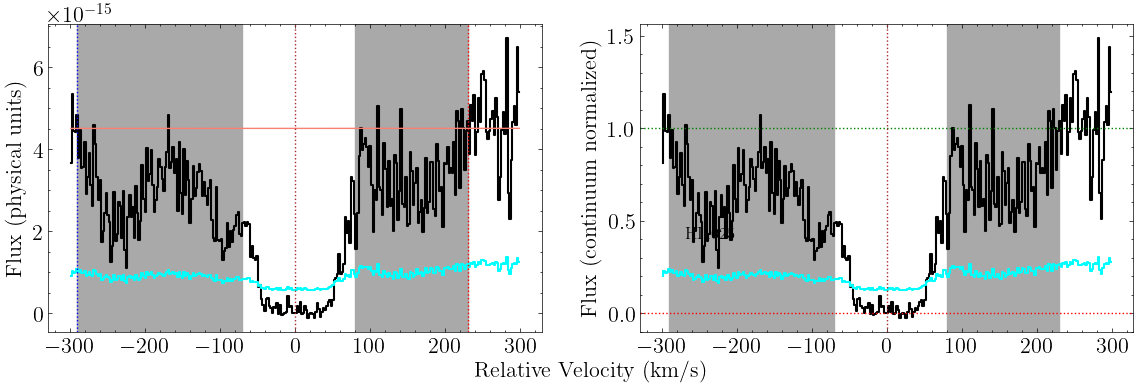

In [14]:
fig, axes = hi_1025_fuv.plot_ion_transition_spec_cont()

In [15]:
hi_1025_fuv.get_EW_total(-100,100)

Integration window: [-100, 100]
EW, 1sig: 508, 12
EW-3sig: 35


In [16]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [17]:
hi_1025_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

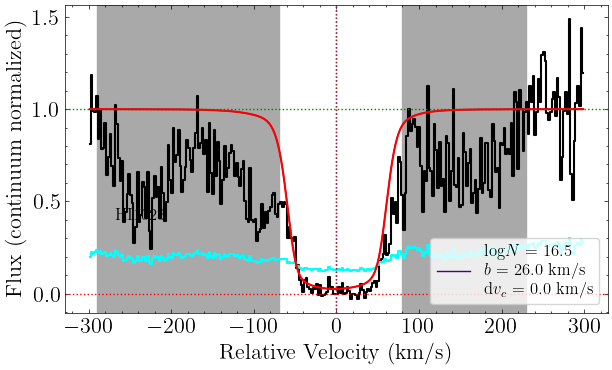

In [18]:
fig, ax = hi_1025_fuv.plot_ion_transition_init_fit()

In [19]:
hi_1025_fuv.fit_ion_transition()

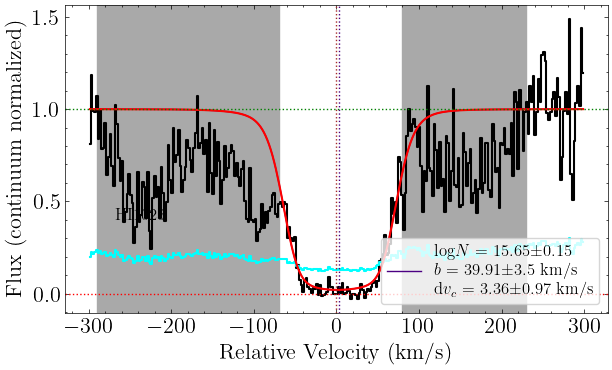

In [20]:
fig, ax = hi_1025_fuv.plot_ion_transition_best_fit()

## HI 972
Get HI 972 from COS FUV

In [21]:
hi_972_fuv = ion_transition('HI', 972, 'H', z_sys, 'FUV')

In [22]:
hi_972_fuv.grab_ion_transition_info()

In [23]:
hi_972_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[80,230]])

In [24]:
hi_972_fuv.cont_norm_flux(v_abs_range=[-90,230], degree=1)

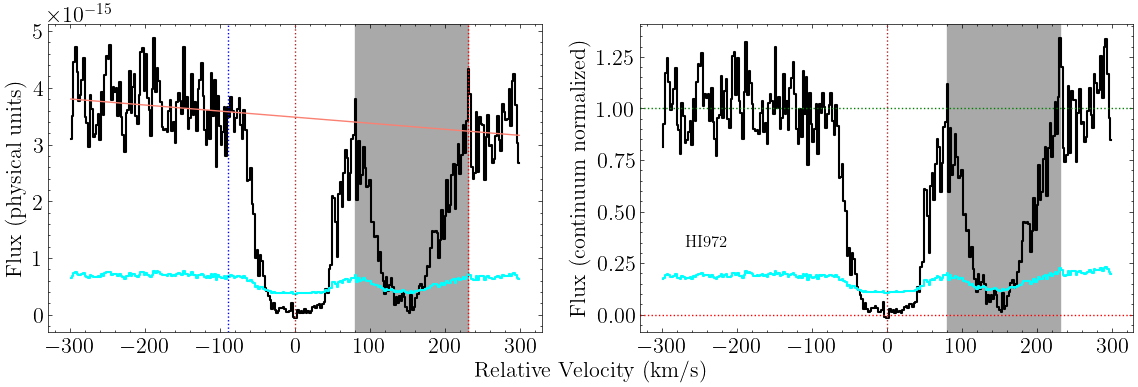

In [25]:
fig, axes = hi_972_fuv.plot_ion_transition_spec_cont()

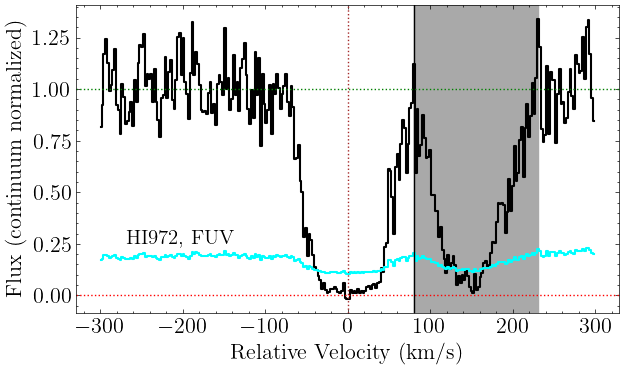

In [26]:
fig, axes = hi_972_fuv.plot_ion_transition_spec()
axes.axvline(80)

In [27]:
hi_972_fuv.get_EW_total(-90,80)

Integration window: [-90, 80]
EW, 1sig: 353, 9
EW-3sig: 27


In [28]:
hi_972_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [29]:
hi_972_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

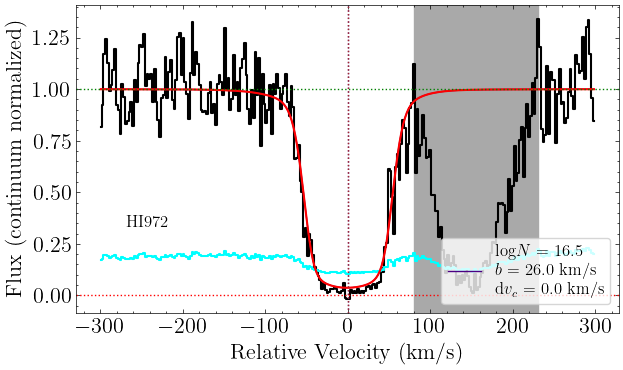

In [30]:
fig, ax = hi_972_fuv.plot_ion_transition_init_fit()

In [31]:
hi_972_fuv.fit_ion_transition()

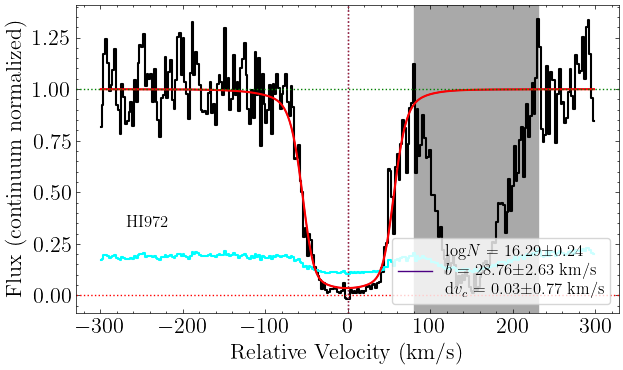

In [32]:
fig, ax = hi_972_fuv.plot_ion_transition_best_fit()

## HI 949
Get HI 949 from COS FUV

In [33]:
hi_949_fuv = ion_transition('HI', 949, 'H', z_sys, 'FUV')

In [34]:
hi_949_fuv.grab_ion_transition_info()

In [35]:
hi_949_fuv.grab_ion_transition_spec(spec_fits_list)

In [36]:
hi_949_fuv.cont_norm_flux(v_abs_range=[-90,90], degree=1)

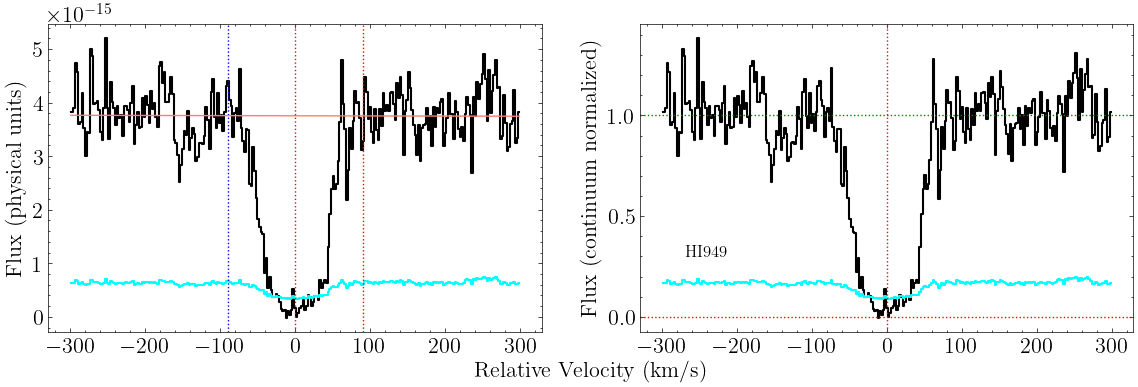

In [37]:
fig, axes = hi_949_fuv.plot_ion_transition_spec_cont()

In [38]:
hi_949_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 293, 9
EW-3sig: 26


In [39]:
hi_949_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [40]:
hi_949_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

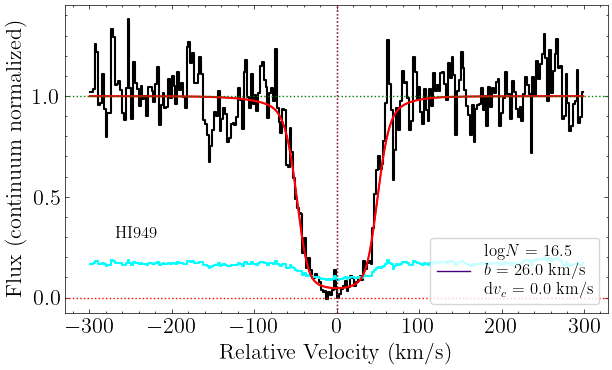

In [41]:
fig, ax = hi_949_fuv.plot_ion_transition_init_fit()

In [42]:
hi_949_fuv.fit_ion_transition()

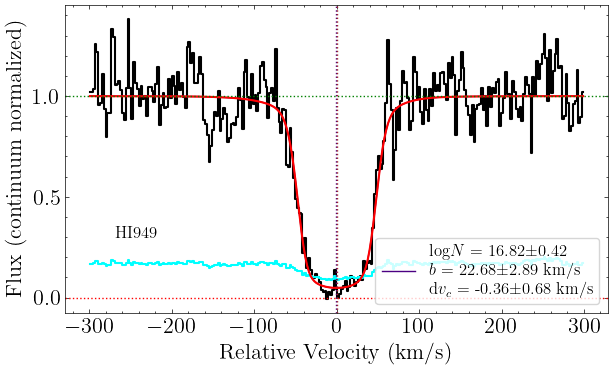

In [43]:
fig, ax = hi_949_fuv.plot_ion_transition_best_fit()

## HI 937
Get HI 937 from COS FUV

In [44]:
hi_937_fuv = ion_transition('HI', 937, 'H', z_sys, 'FUV')

In [45]:
hi_937_fuv.grab_ion_transition_info()

In [46]:
hi_937_fuv.grab_ion_transition_spec(spec_fits_list)

In [47]:
hi_937_fuv.cont_norm_flux(v_abs_range=[-90,125], degree=1)

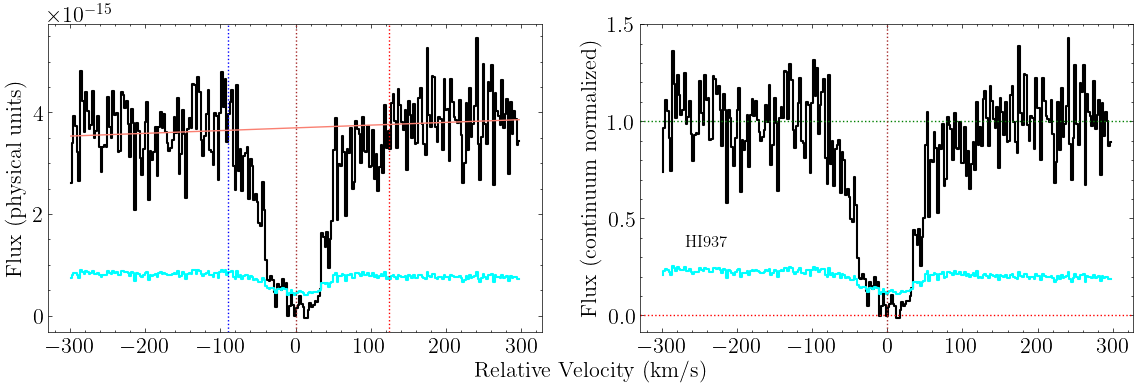

In [48]:
fig, axes = hi_937_fuv.plot_ion_transition_spec_cont()

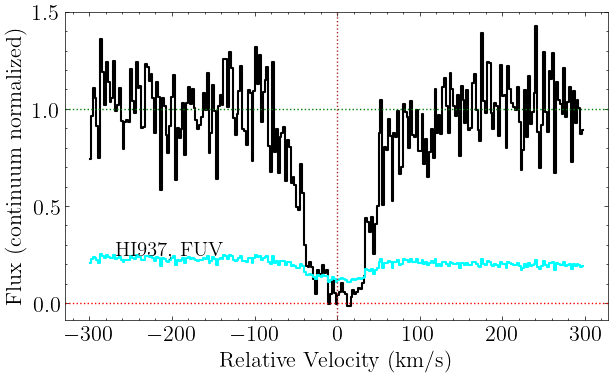

In [49]:
fig, axes = hi_937_fuv.plot_ion_transition_spec()
#axes.set_yticks([0,0.5,1])

In [50]:
hi_937_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 290, 11
EW-3sig: 33


In [51]:
hi_937_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [52]:
hi_937_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

In [53]:
hi_937_fuv.f, hi_937_fuv.gamma

(0.007799, 0.002297618575)

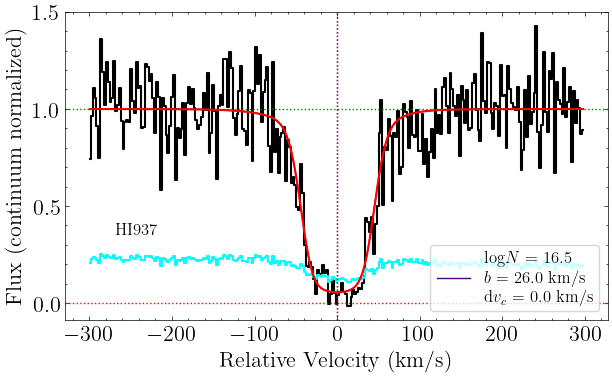

In [54]:
fig, ax = hi_937_fuv.plot_ion_transition_init_fit()

In [55]:
hi_937_fuv.fit_ion_transition()

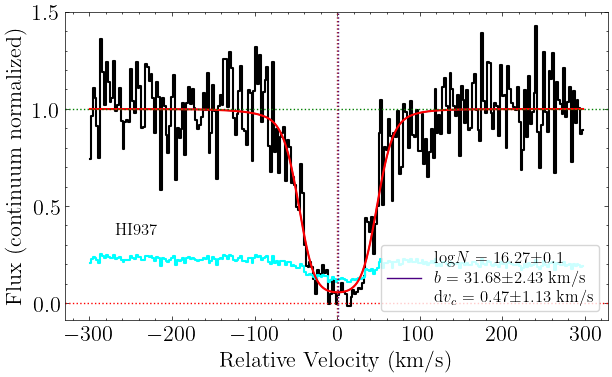

In [56]:
fig, ax = hi_937_fuv.plot_ion_transition_best_fit()

## HI ion (HI 937 only)

In [57]:
hi_937 = ion(z_sys, 'HI_937', [hi_937_fuv])

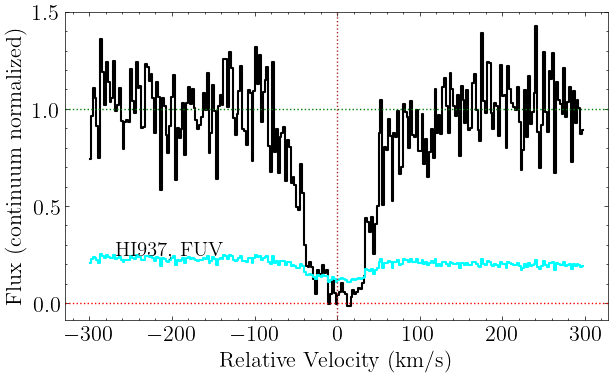

In [58]:
fig, axes = hi_937.plot_ion()

In [59]:
hi_937.init_ion([hi_937_fuv.best_values])
#oiv.init_ion(np.array([[14.6,17,-1.45]]))

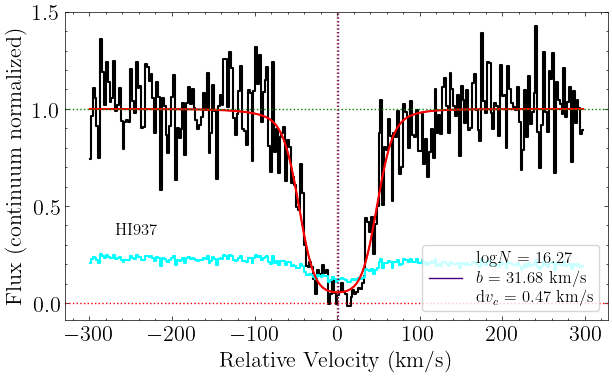

In [60]:
fig, axes = hi_937.plot_ion_init_fit()

In [61]:
hi_937.fit_ion()

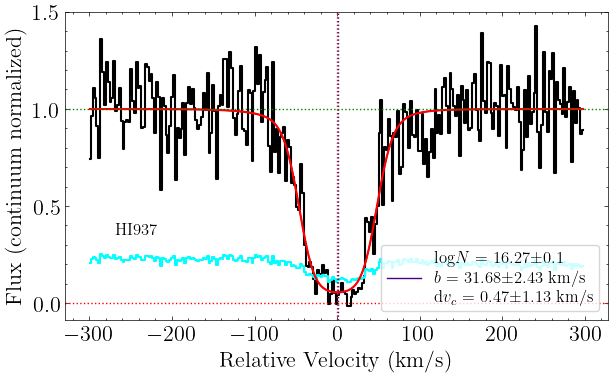

In [62]:
fig, axes = hi_937.plot_ion_best_fit()

In [63]:
#hi_937.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=5000)
#hi_937.fit_ion_emcee(load=True, loaddir=rootdir)

In [64]:
#fig, axes = hi_937.plot_samples()

In [65]:
#hi_937.plot_corner()

## HI 930

In [66]:
hi_930_fuv = ion_transition('HI', 930, 'H', z_sys, 'FUV')

In [67]:
hi_930_fuv.grab_ion_transition_info()

In [68]:
hi_930_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-260,-80],[120,300]])

In [69]:
hi_930_fuv.cont_norm_flux(v_abs_range=[-70, 70], degree=1)

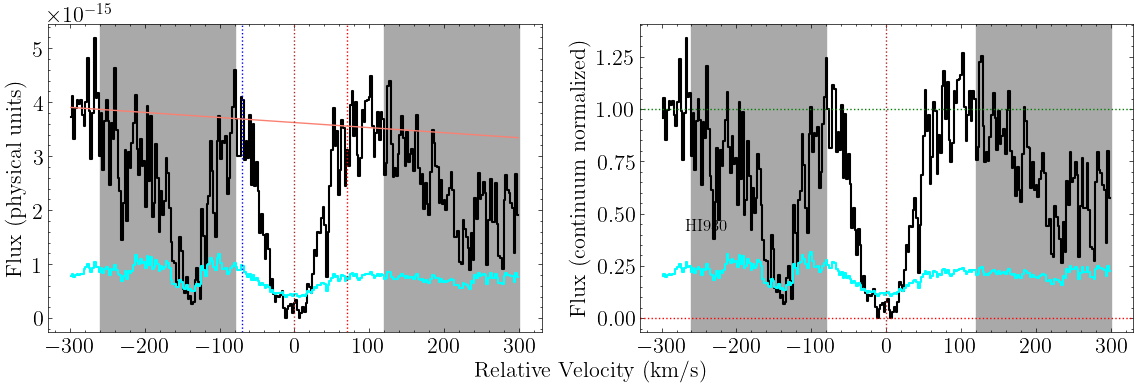

In [70]:
fig, axes = hi_930_fuv.plot_ion_transition_spec_cont()

In [71]:
hi_930_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 248, 9
EW-3sig: 28


In [72]:
hi_930_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [73]:
hi_930_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

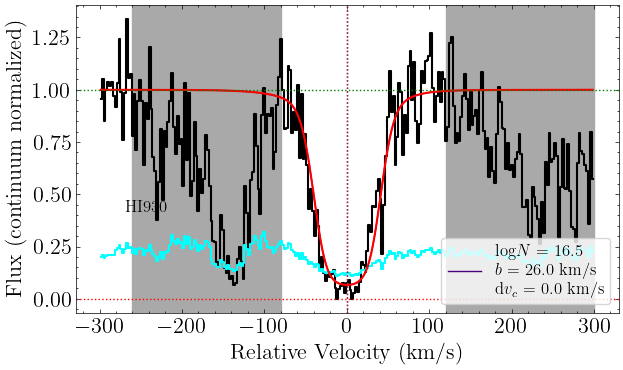

In [74]:
fig, ax = hi_930_fuv.plot_ion_transition_init_fit()

In [75]:
hi_930_fuv.fit_ion_transition()

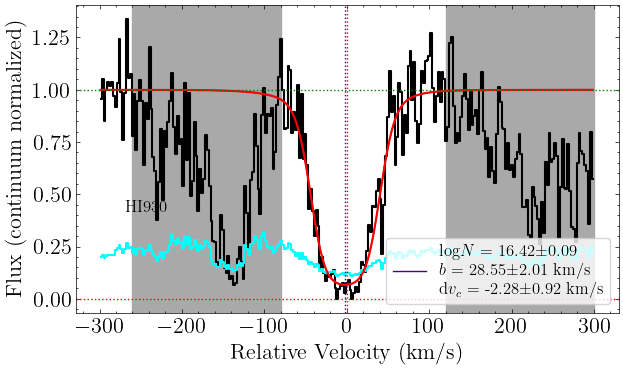

In [76]:
fig, ax = hi_930_fuv.plot_ion_transition_best_fit()

## HI 923
Get HI 923 from COS FUV

In [77]:
hi_923_fuv = ion_transition('HI', 923, 'H', z_sys, 'FUV')

In [78]:
hi_923_fuv.grab_ion_transition_info()

In [79]:
hi_923_fuv.grab_ion_transition_spec(spec_fits_list)

In [80]:
hi_923_fuv.cont_norm_flux(v_abs_range=[-70,70], degree=1)

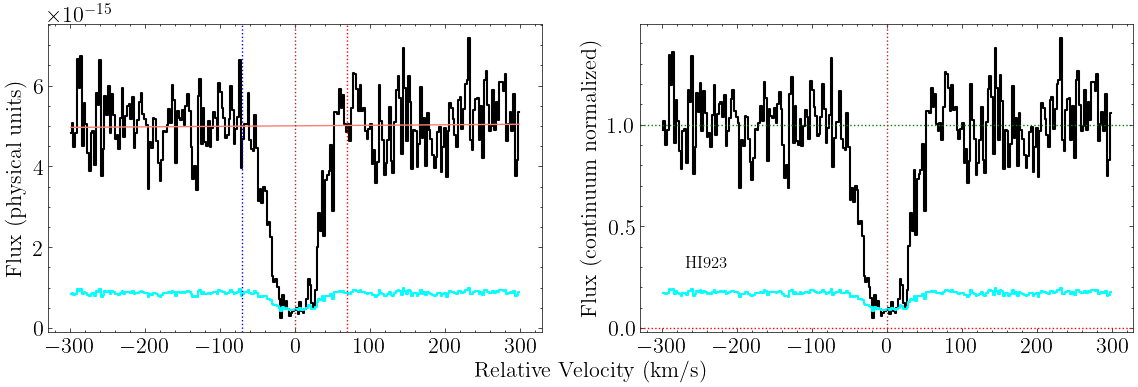

In [81]:
fig, axes = hi_923_fuv.plot_ion_transition_spec_cont()

In [82]:
hi_923_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 204, 8
EW-3sig: 23


In [83]:
hi_923_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [84]:
hi_923_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

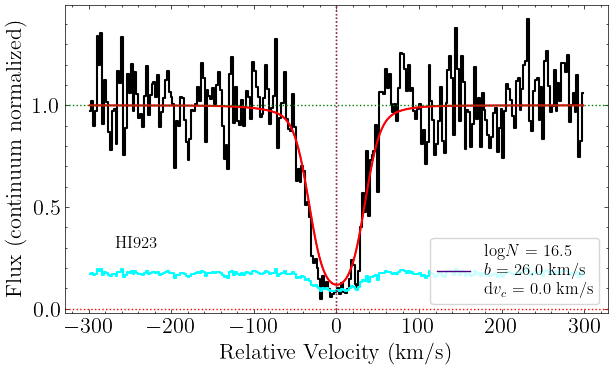

In [85]:
fig, ax = hi_923_fuv.plot_ion_transition_init_fit()

In [86]:
hi_923_fuv.fit_ion_transition()

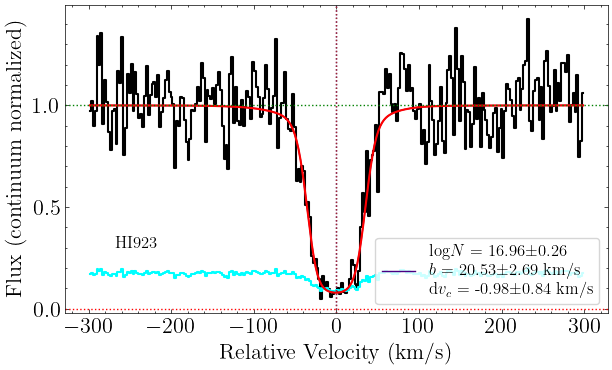

In [87]:
fig, ax = hi_923_fuv.plot_ion_transition_best_fit()

## HI 920
Get HI 920 from COS FUV

In [88]:
hi_920_fuv = ion_transition('HI', 921, 'H', z_sys, 'FUV')

In [89]:
hi_920_fuv.grab_ion_transition_info()

In [90]:
hi_920_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-90],[100,150]])

In [91]:
hi_920_fuv.cont_norm_flux(v_abs_range=[-90, 100], degree=1)

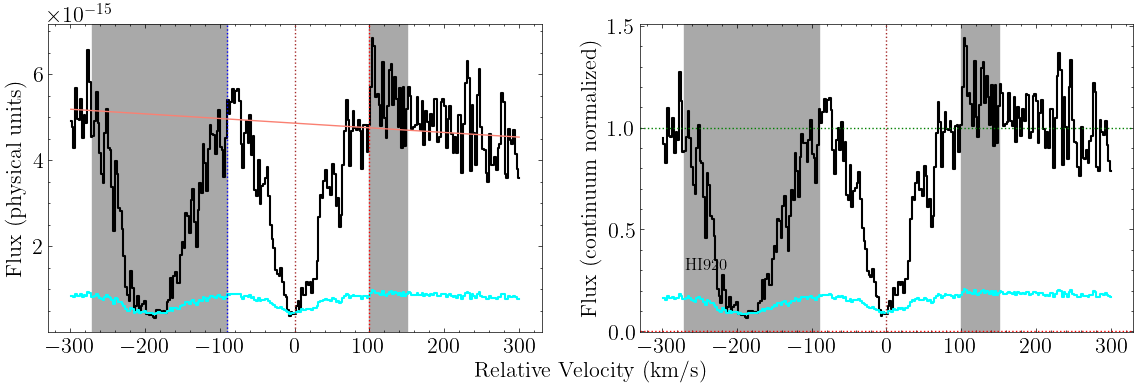

In [92]:
fig, axes = hi_920_fuv.plot_ion_transition_spec_cont()

In [93]:
hi_920_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 207, 9
EW-3sig: 27


In [94]:
hi_920_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [95]:
hi_920_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

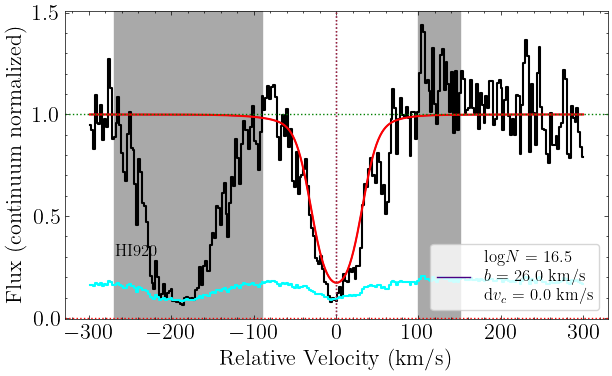

In [96]:
fig, ax = hi_920_fuv.plot_ion_transition_init_fit()

In [97]:
hi_920_fuv.fit_ion_transition()

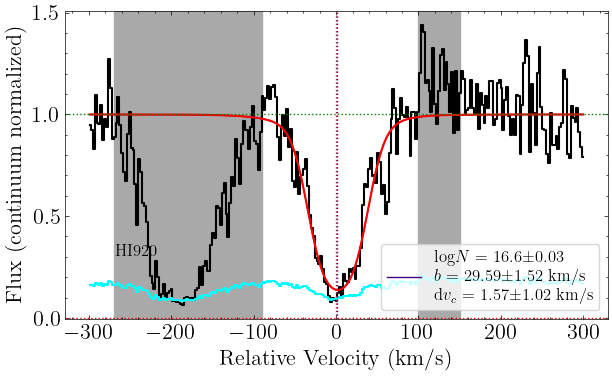

In [98]:
fig, ax = hi_920_fuv.plot_ion_transition_best_fit()

## HI 919

In [14]:
hi_919_fuv = ion_transition('HI', 919, 'H', z_sys, 'COS FUV')

In [15]:
hi_919_fuv.grab_ion_transition_info()

In [33]:
hi_919_fuv.wav0_rest

919.3514

In [16]:
hi_919_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[250,300]])

In [17]:
hi_919_fuv.cont_norm_flux(v_abs_range=[-90,100], degree=1)

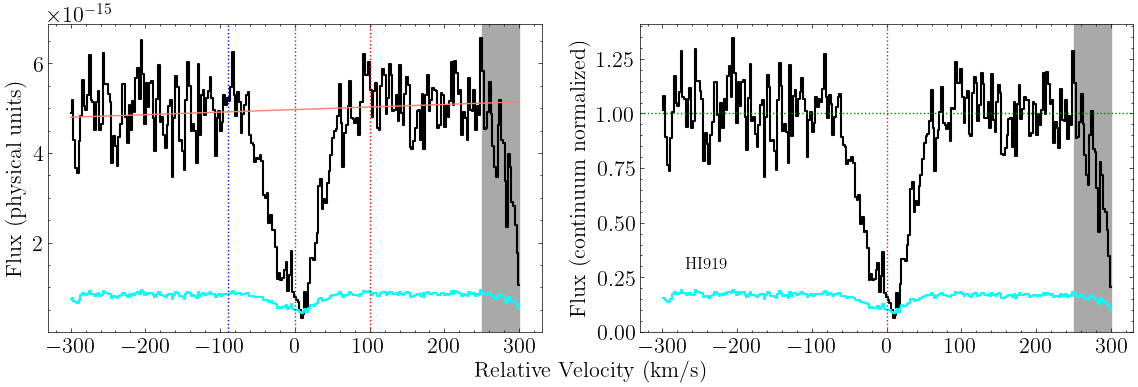

In [18]:
fig, axes = hi_919_fuv.plot_ion_transition_spec_cont()

In [19]:
hi_919_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 189, 9
EW-3sig: 27.469


In [20]:
hi_919_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [45]:
hi_919_fuv.init_ion_transition(init_values = np.array([[16.76,23.7, 0]]), 
                             lsf_convolve = True)

In [46]:
np.savetxt('/Users/thepoetoftwilight/Documents/CUBS/Data/CONTACT/COS_FUV/J0333-4102/HI_model.dat',
           np.array([hi_919_fuv.v, hi_919_fuv.init_total_flux]).T)

(-0.05, 1.15)

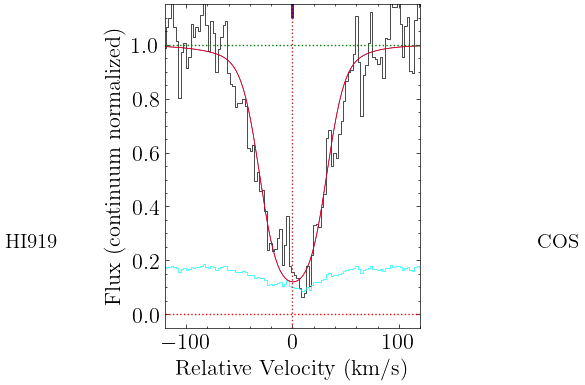

In [47]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

hi_919_fuv.plot_ion_transition_init_fit(fig=fig, ax=ax,legend=False)
ax.set_xlim(-110,110)
ax.set_ylim(-0.1,1.1)

ax.set_xlim(-120,120)
ax.set_ylim(-0.2/4, 1.15)

In [108]:
hi_919_fuv.fit_ion_transition()

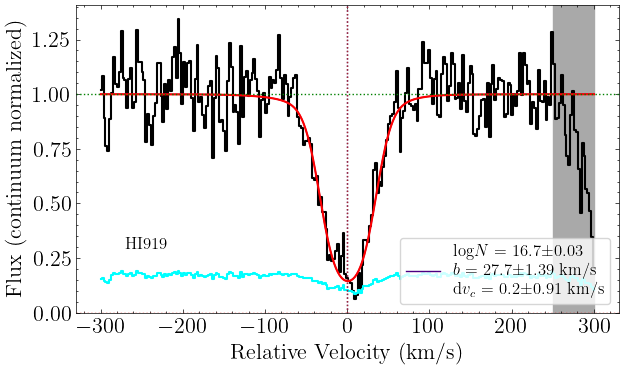

In [109]:
fig, ax = hi_919_fuv.plot_ion_transition_best_fit()

## HI 918

In [110]:
hi_918_fuv = ion_transition('HI', 918, 'H', z_sys, 'FUV')

In [111]:
hi_918_fuv.grab_ion_transition_info()

In [112]:
hi_918_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260]])

In [113]:
hi_918_fuv.cont_norm_flux(v_abs_range=[-70,100], degree=1)

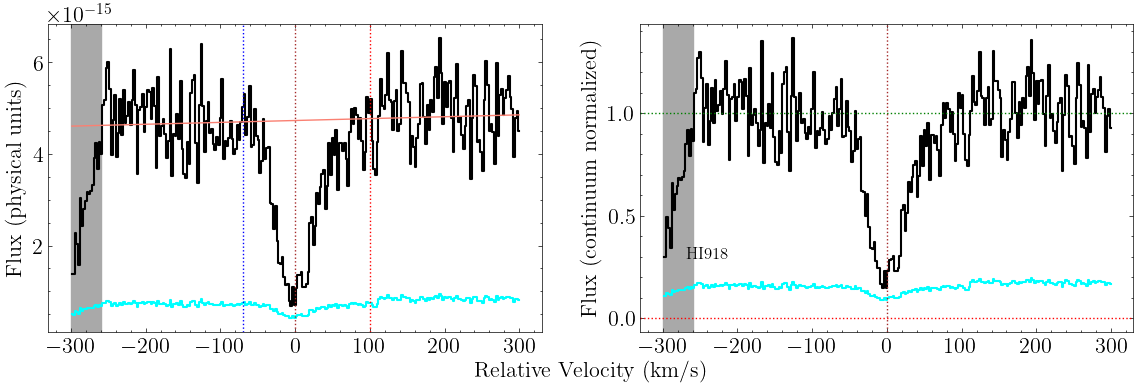

In [114]:
fig, axes = hi_918_fuv.plot_ion_transition_spec_cont()

In [115]:
hi_918_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 156, 7
EW-3sig: 21


In [116]:
hi_918_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [117]:
hi_918_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]),
                             lsf_convolve = True)

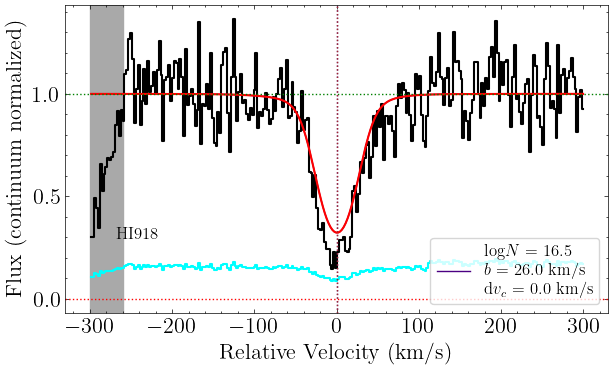

In [118]:
fig, ax = hi_918_fuv.plot_ion_transition_init_fit()

In [119]:
hi_918_fuv.fit_ion_transition()

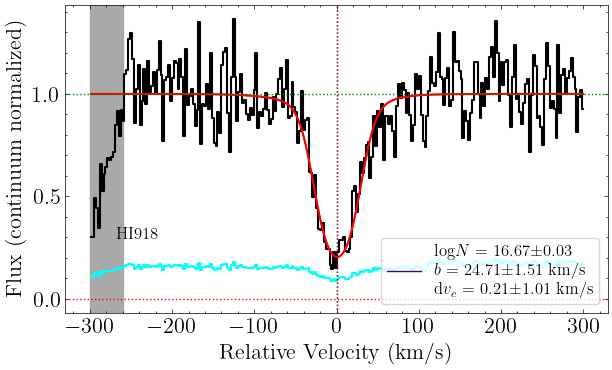

In [120]:
fig, ax = hi_918_fuv.plot_ion_transition_best_fit()

## HI ion

In [121]:
hi = ion(z_sys, 'HI', [hi_1025_fuv, hi_972_fuv, hi_949_fuv, hi_937_fuv, hi_930_fuv, 
                       hi_923_fuv, hi_920_fuv, hi_919_fuv, hi_918_fuv])

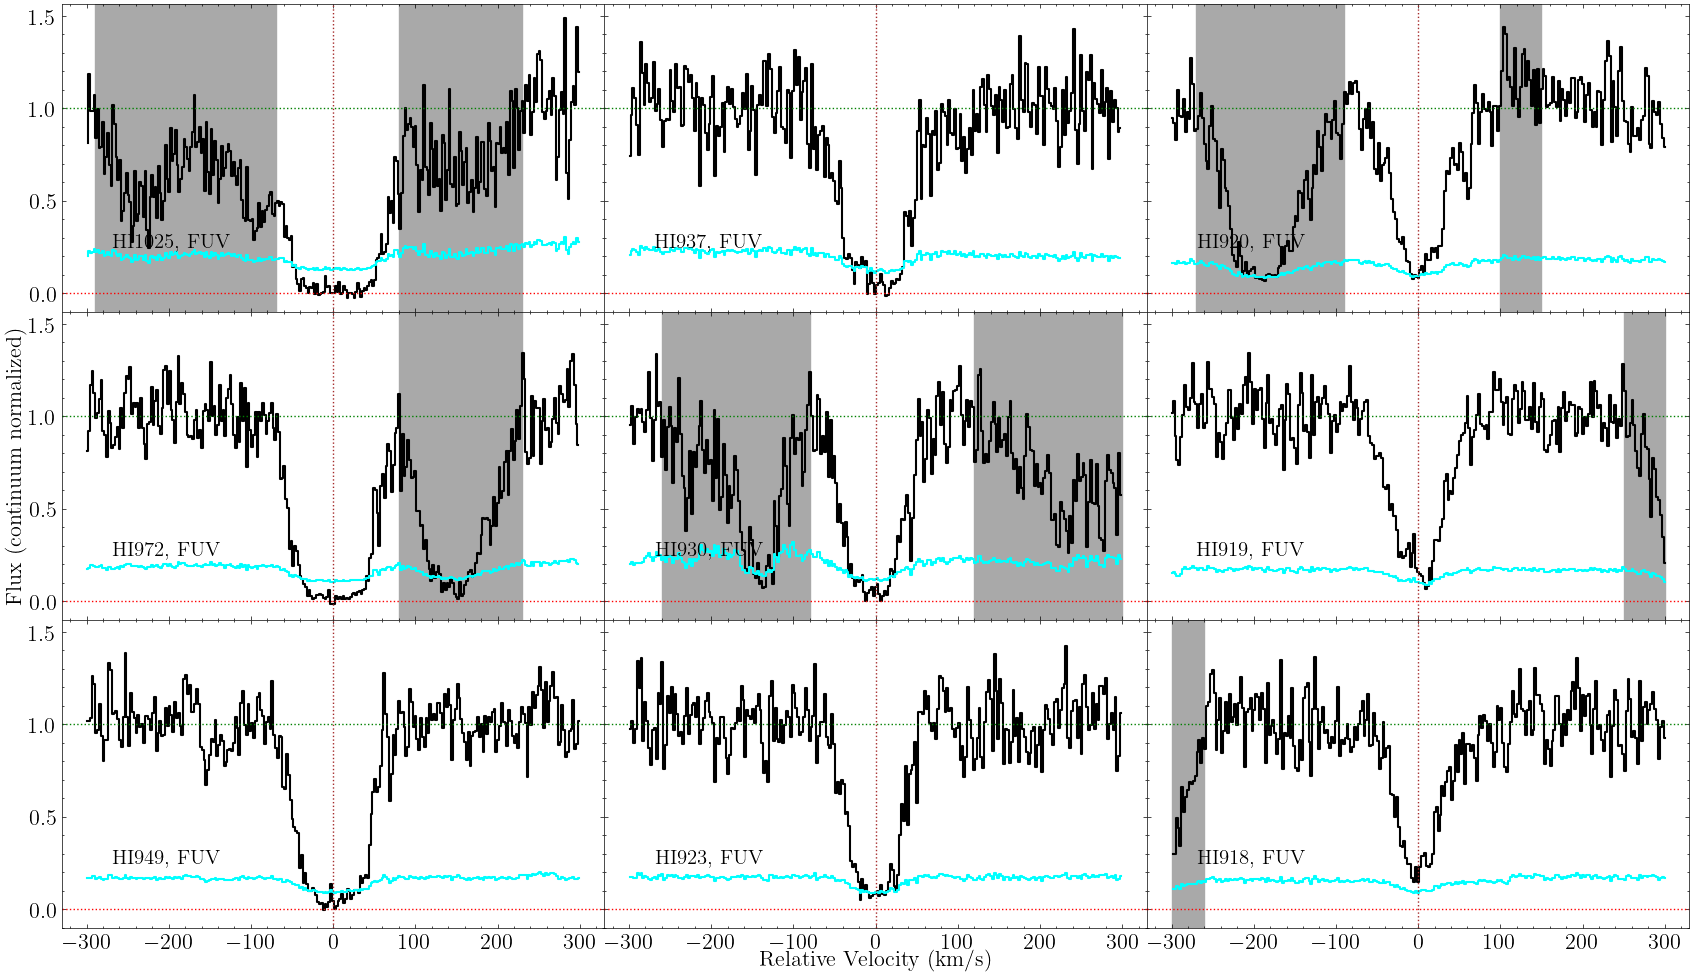

In [122]:
fig, axes = hi.plot_ion(n_cols=3, label_axes=True)

In [123]:
hi.init_ion([[[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]]])

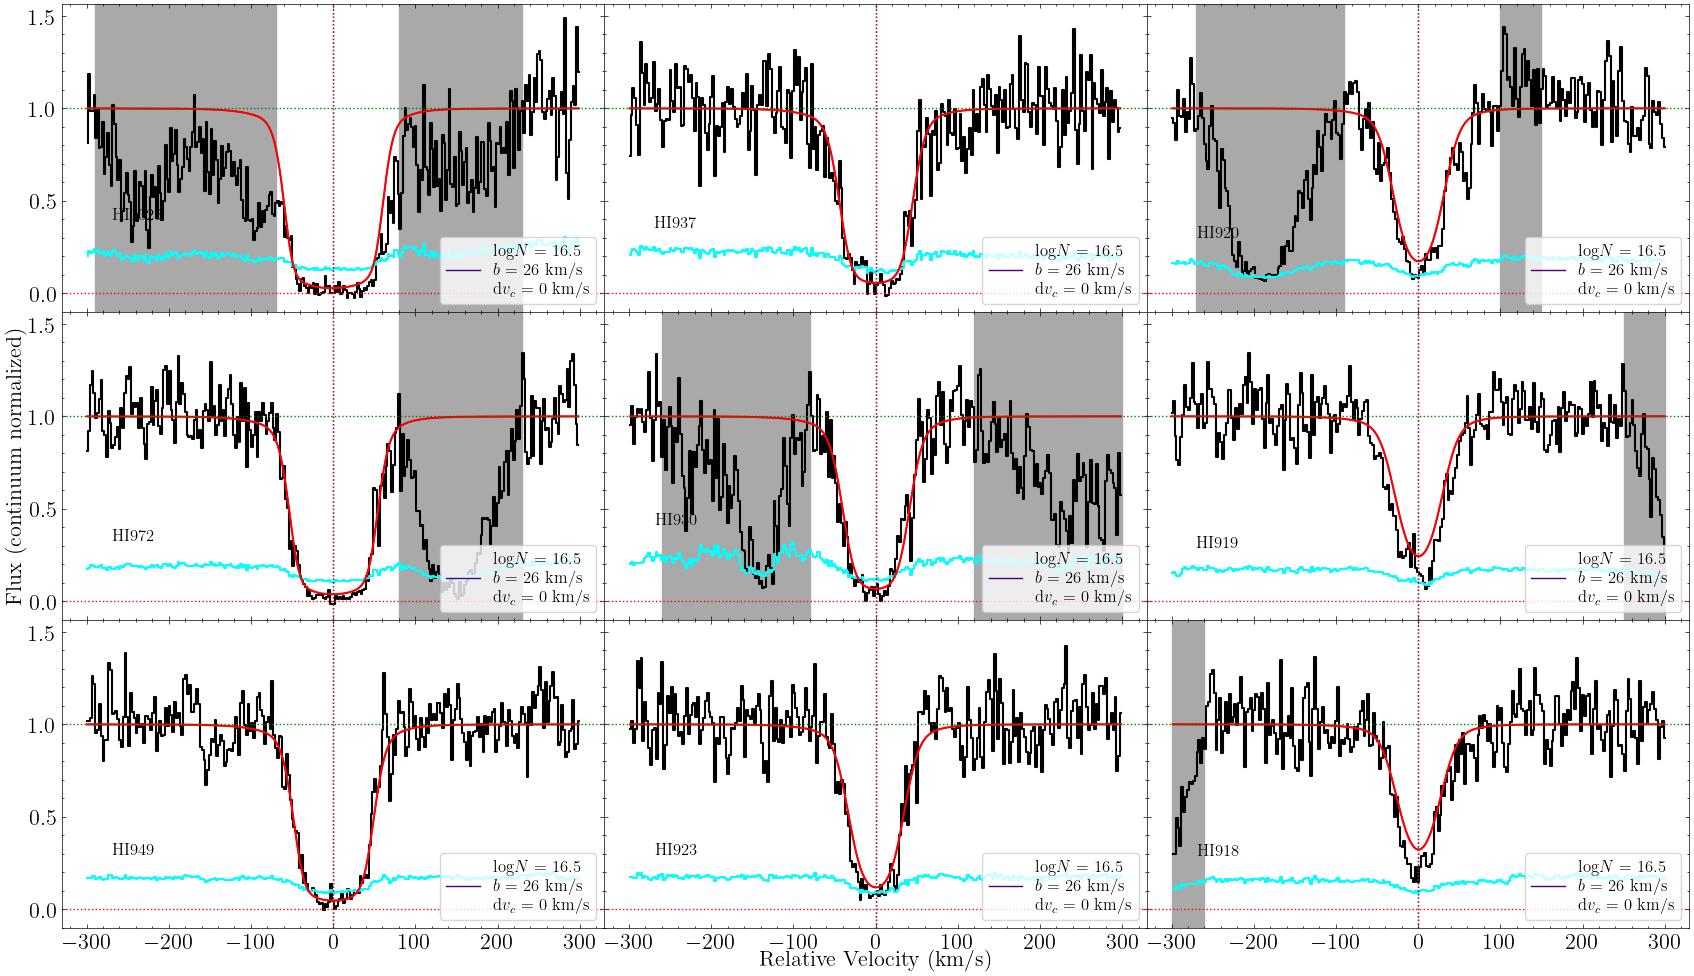

In [124]:
fig, axes = hi.plot_ion_init_fit(n_cols=3)

In [125]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'],
                            ['it1c1_logN', 'it3c1_logN'],
                            ['it1c1_logN', 'it4c1_logN'],
                            ['it1c1_logN', 'it5c1_logN'],
                            ['it1c1_logN', 'it6c1_logN'],
                            ['it1c1_logN', 'it7c1_logN'],
                            ['it1c1_logN', 'it8c1_logN'],
                            ['it1c1_logN', 'it9c1_logN'],
                            ['it1c1_b', 'it2c1_b'],
                            ['it1c1_b', 'it3c1_b'],
                            ['it1c1_b', 'it4c1_b'],
                            ['it1c1_b', 'it5c1_b'],
                            ['it1c1_b', 'it6c1_b'],
                            ['it1c1_b', 'it7c1_b'],
                            ['it1c1_b', 'it8c1_b'],
                            ['it1c1_b', 'it9c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'],
                            ['it1c1_dv_c', 'it3c1_dv_c'],
                            ['it1c1_dv_c', 'it4c1_dv_c'],
                            ['it1c1_dv_c', 'it5c1_dv_c'],
                            ['it1c1_dv_c', 'it6c1_dv_c'],
                            ['it1c1_dv_c', 'it7c1_dv_c'],
                            ['it1c1_dv_c', 'it8c1_dv_c'],
                            ['it1c1_dv_c', 'it9c1_dv_c']])

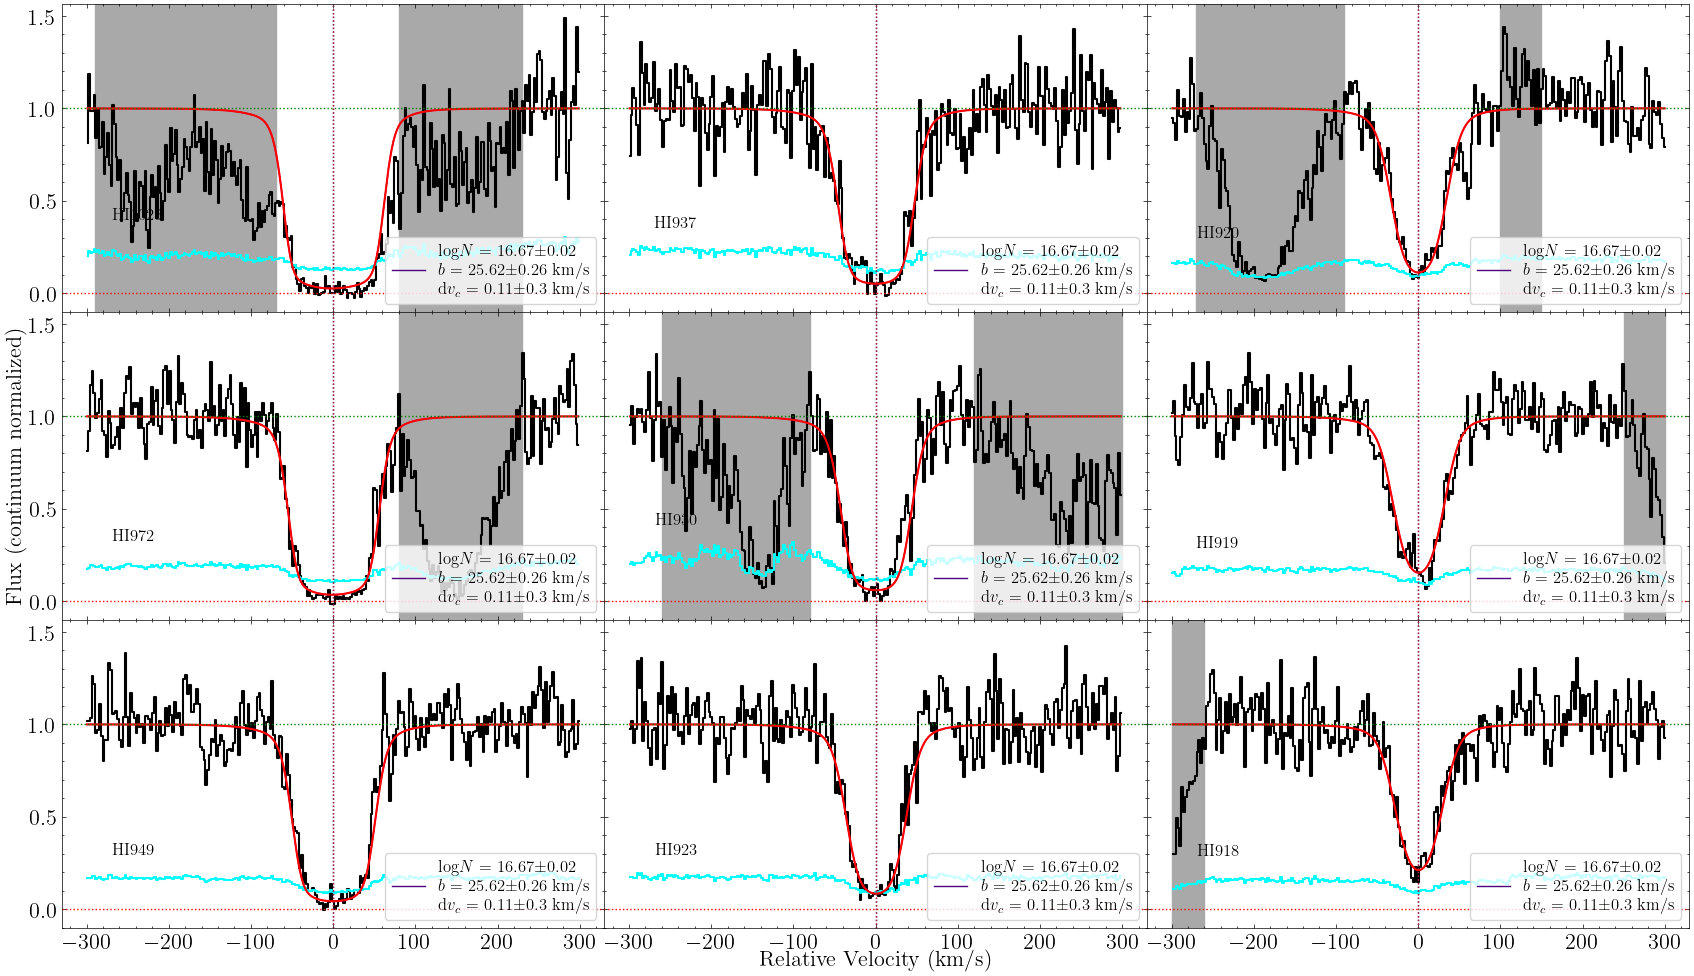

In [126]:
fig, axes = hi.plot_ion_best_fit(n_cols=3)

In [127]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=200, n_steps=2500)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [128]:
#fig, axes = hi.plot_samples(n_cols=3)

In [129]:
#hi.plot_corner()

# CIII

## CIII 977
Get CIII 977 from COS FUV

In [130]:
ciii_977_fuv = ion_transition('CIII', 977, 'C', z_sys, 'FUV')

In [131]:
ciii_977_fuv.grab_ion_transition_info(delta_v = -5.5)

In [132]:
ciii_977_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-250],[-160,-30],[25,170]]) #masks=[[-300,-140],[25,170]])

In [133]:
ciii_977_fuv.cont_norm_flux(v_abs_range=[-40,25], degree=1)

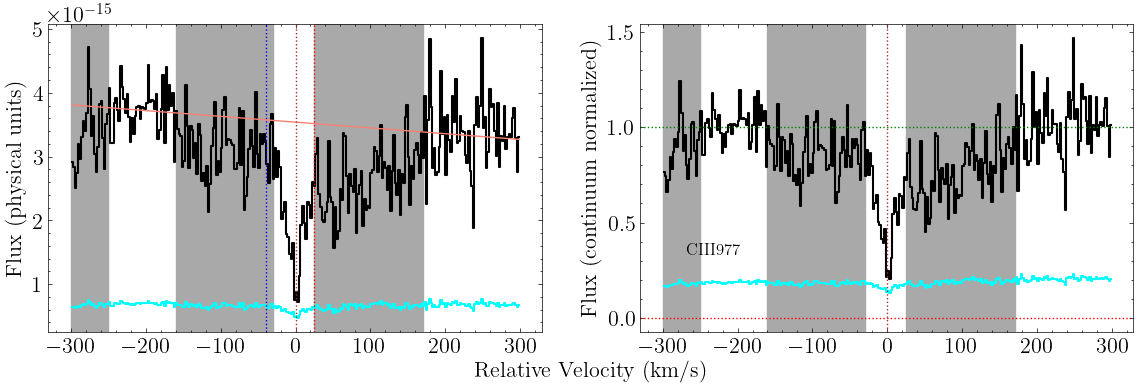

In [134]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec_cont()

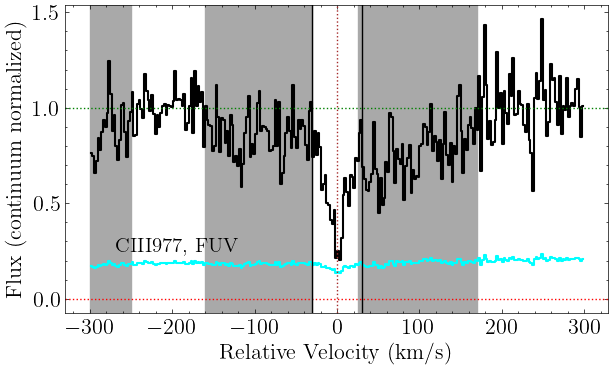

In [135]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec()
ax.axvline(-30)
ax.axvline(30)

In [136]:
ciii_977_fuv.get_EW_total(-30,25)

Integration window: [-30, 25]
EW, 1sig: 77, 6
EW-3sig: 17


In [137]:
ciii_977_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [138]:
ciii_977_fuv.init_ion_transition(init_values = np.array([[13.34, 17, 0]]), 
                             lsf_convolve = True)

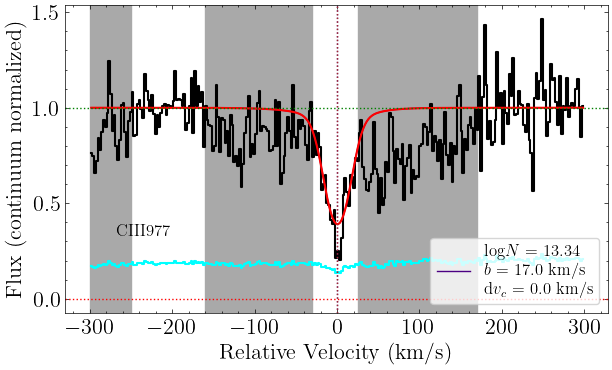

In [139]:
fig, ax = ciii_977_fuv.plot_ion_transition_init_fit()

In [140]:
ciii_977_fuv.fit_ion_transition()

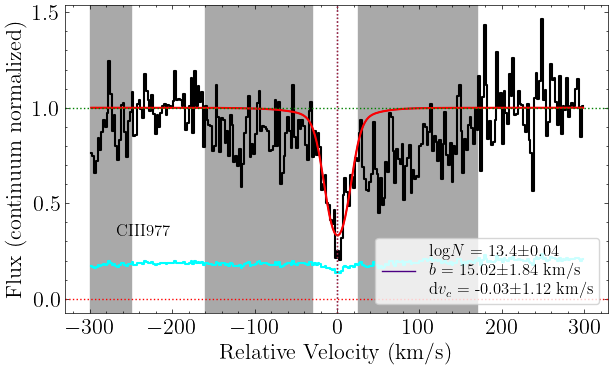

In [141]:
fig, ax = ciii_977_fuv.plot_ion_transition_best_fit()

## CIII ion

In [142]:
ciii = ion(z_sys, 'CIII', [ciii_977_fuv])

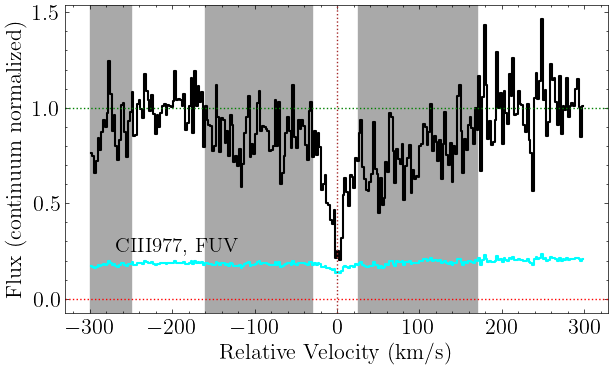

In [143]:
fig, axes = ciii.plot_ion()

In [144]:
ciii.init_ion([[[13.4, 8, 0]]])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

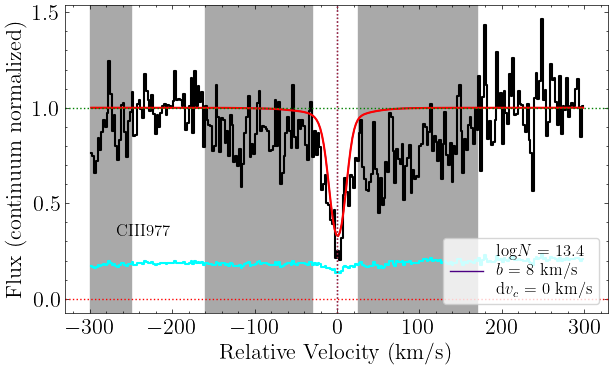

In [145]:
fig, axes = ciii.plot_ion_init_fit()

In [146]:
ciii.fit_ion(fix_params_list = ['it1c1_dv_c'],
            lower_bounds_dict = {'it1c1_b':8})
            #lower_bounds_dict = {'it1c1_b':8})

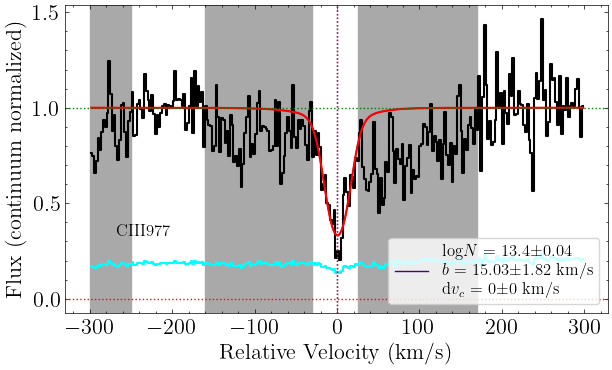

In [147]:
fig, axes = ciii.plot_ion_best_fit()

In [148]:
#ciii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#ciii.fit_ion_emcee(load=True, loaddir=rootdir)

In [149]:
#fig, axes = ciii.plot_samples()

In [150]:
#ciii.plot_corner()

# OIII

## OIII 832
Get OIII 832 from COS FUV

In [151]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys, 'FUV')

In [152]:
oiii_832_fuv.grab_ion_transition_info(delta_v=-2)

In [153]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [154]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-40,40], degree=1)

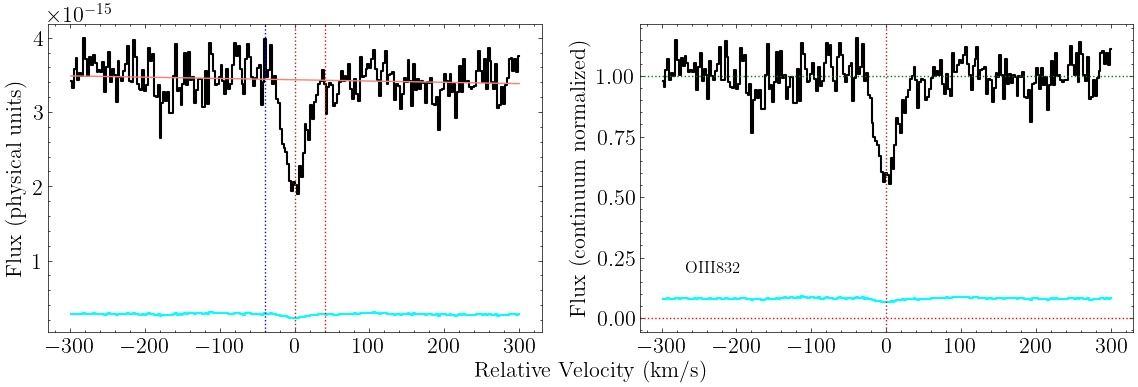

In [155]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

In [156]:
oiii_832_fuv.get_EW_total(-40,40)

Integration window: [-40, 40]
EW, 1sig: 37, 3
EW-3sig: 9


In [157]:
oiii_832_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [158]:
oiii_832_fuv.init_ion_transition(init_values = np.array([[14.1, 19, 0]]), 
                             lsf_convolve = True)

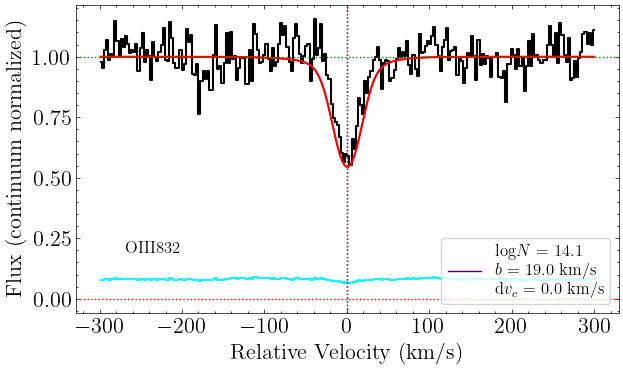

In [159]:
fig, ax = oiii_832_fuv.plot_ion_transition_init_fit()

In [160]:
oiii_832_fuv.fit_ion_transition()

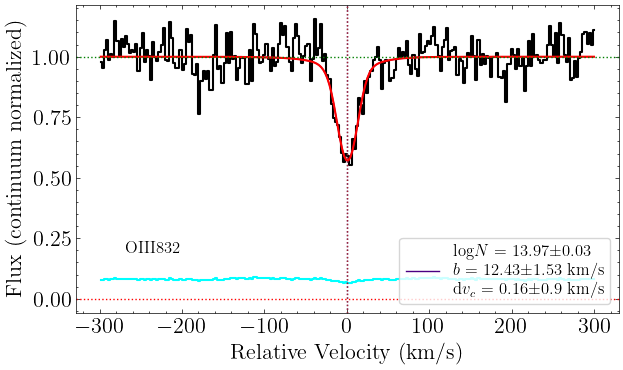

In [161]:
fig, ax = oiii_832_fuv.plot_ion_transition_best_fit()

## OIII ion

In [162]:
oiii = ion(z_sys, 'OIII', [oiii_832_fuv])

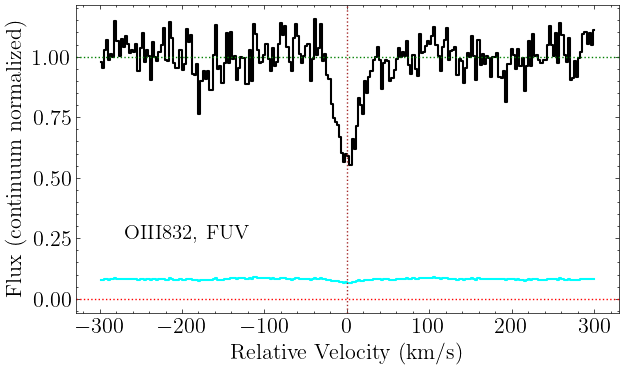

In [163]:
fig, axes = oiii.plot_ion()

In [164]:
oiii.init_ion([oiii_832_fuv.best_values])
#oiii.init_ion(np.array([[13.95,17,-0.89]]))

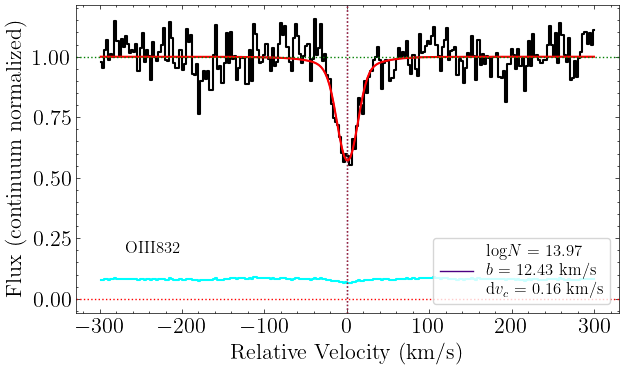

In [165]:
fig, axes = oiii.plot_ion_init_fit()

In [166]:
oiii.fit_ion(fix_params_list = ['it1c1_dv_c'])

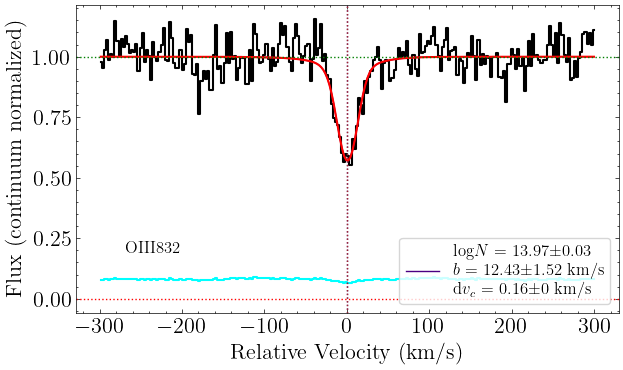

In [167]:
fig, axes = oiii.plot_ion_best_fit()

In [168]:
#oiii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
#oiii.fit_ion_emcee(load=True, loaddir=rootdir)

In [169]:
#fig, axes = oiii.plot_samples()

In [170]:
#oiii.plot_corner()

# OIV

## Interlude: HI 1025 (z=0.32)
Get HI 1025 from COS FUV

In [171]:
hi_1025_fuv = ion_transition('HI', 1025, 'H', 0.32768034, 'FUV')

In [172]:
hi_1025_fuv.grab_ion_transition_info()

In [173]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list)

In [174]:
hi_1025_fuv.cont_norm_flux(v_abs_range=[-70,255], degree=1)

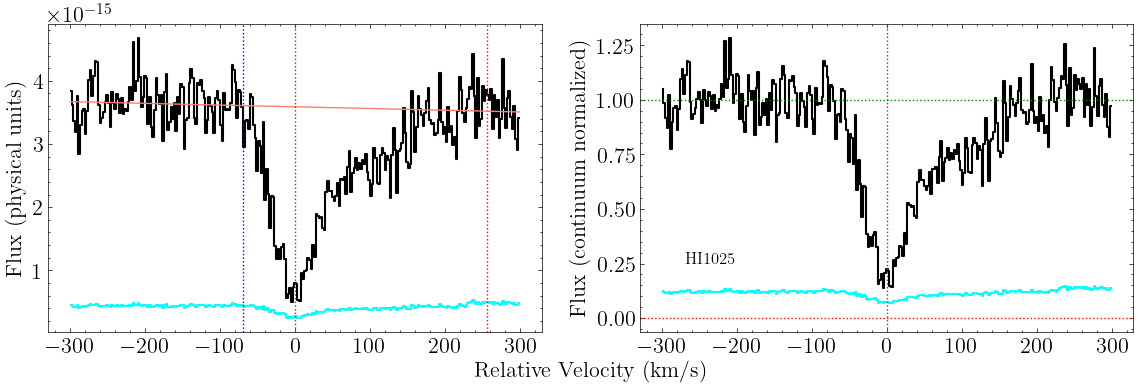

In [175]:
fig, ax = hi_1025_fuv.plot_ion_transition_spec_cont()

In [176]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [177]:
hi_1025_fuv.init_ion_transition([[14.2, 17, 0], [14.2, 46, 43]], 
                            lsf_convolve = True)

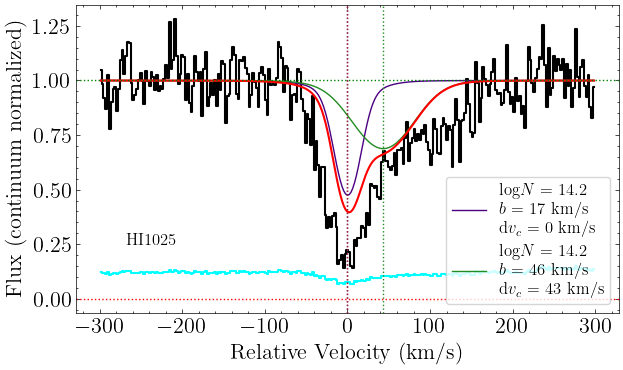

In [178]:
fig, ax = hi_1025_fuv.plot_ion_transition_init_fit()

## OIV 787 at z=0.72 with HI 1025 at z=0.32
Get OIV 787 from COS FUV

In [179]:
oiv_787_fuv_init = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [180]:
oiv_787_fuv_init.grab_ion_transition_info()

In [181]:
oiv_787_fuv_init.grab_ion_transition_spec(spec_fits_list)

In [182]:
oiv_787_fuv_init.cont_norm_flux(v_abs_range=[-70,255], degree=1)

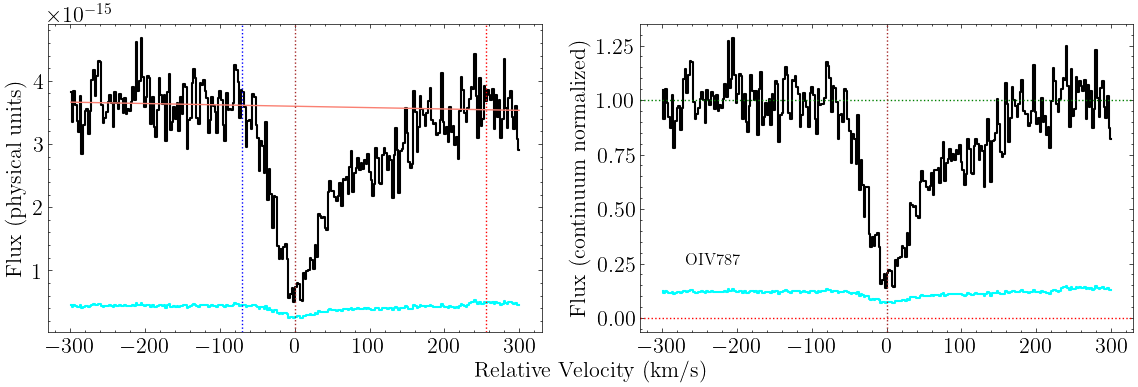

In [183]:
fig, ax = oiv_787_fuv_init.plot_ion_transition_spec_cont()

In [184]:
oiv_787_fuv_init.grab_ion_transition_lsf(lsf_fits_list)

In [185]:
oiv_787_fuv_init.init_ion_transition(init_values = np.array([[14.42, 30, 0]]),  # Use centroid from OIII
                             lsf_convolve = True)

In [186]:
dv_c_hi_1025_fuv = 3e+5*((hi_1025_fuv.wav0_obs-oiv_787_fuv_init.wav0_obs)/oiv_787_fuv_init.wav0_obs)

In [187]:
hi_flux_interp = np.interp(oiv_787_fuv_init.v, hi_1025_fuv.v+dv_c_hi_1025_fuv, hi_1025_fuv.init_total_flux)

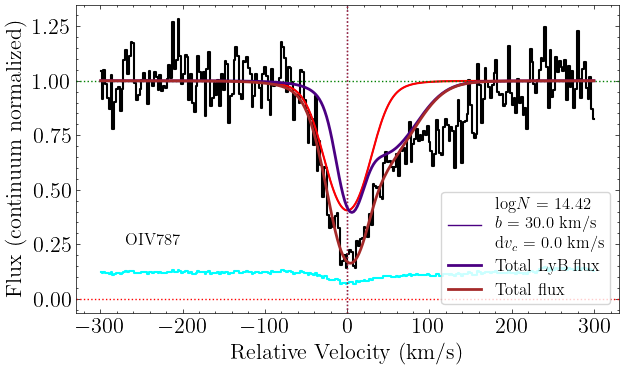

In [188]:
fig, ax = oiv_787_fuv_init.plot_ion_transition_init_fit()
ax.plot(oiv_787_fuv_init.v, hi_flux_interp, lw=2, color='indigo', label='Total LyB flux')
ax.plot(oiv_787_fuv_init.v, oiv_787_fuv_init.init_total_flux*hi_flux_interp, lw=2, color='brown', label='Total flux')

ax.legend(loc='lower right')

## OIV 787

In [189]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [190]:
oiv_787_fuv.grab_ion_transition_info()

In [191]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[50,160]])

In [192]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-65,165], degree=1)

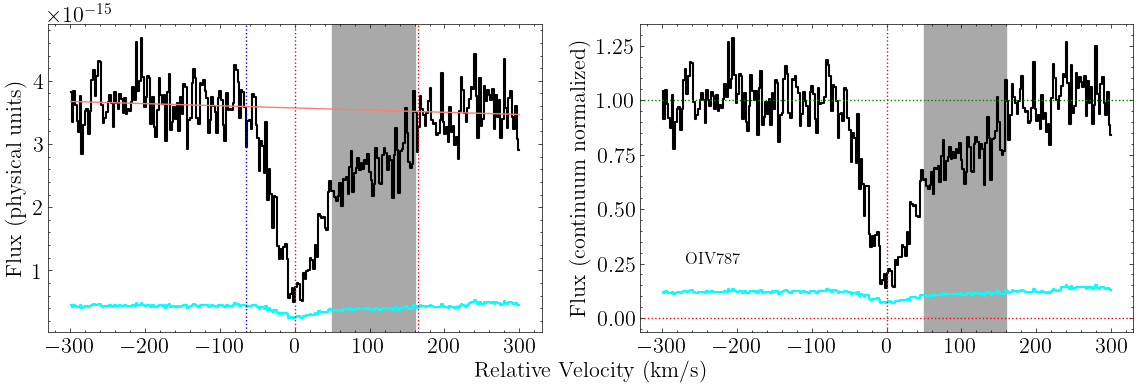

In [193]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [194]:
oiv_787_fuv.flux_norm = oiv_787_fuv.flux_norm/hi_flux_interp

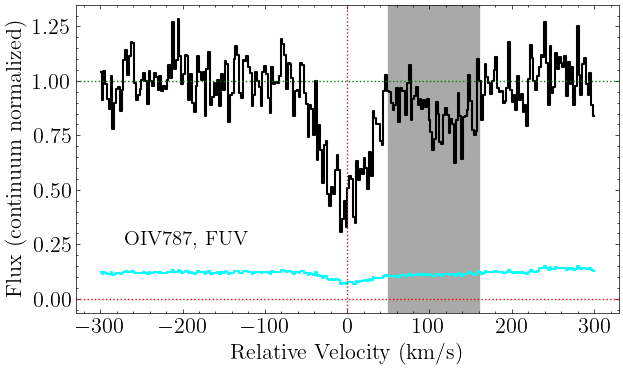

In [195]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec()
#ax.axvline(65)

In [196]:
oiv_787_fuv.get_EW_total(-65,65)

Integration window: [-65, 65]
EW, 1sig: 99, 4
EW-3sig: 13


In [197]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [198]:
oiv_787_fuv.init_ion_transition(init_values = np.array([[14.69, 18, 0]]), 
                             lsf_convolve = True)

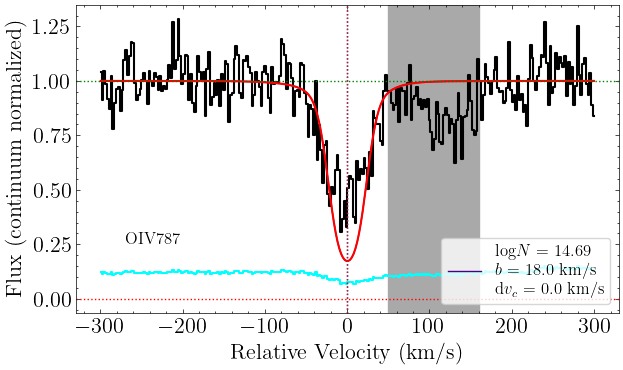

In [199]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [200]:
oiv_787_fuv.fit_ion_transition()

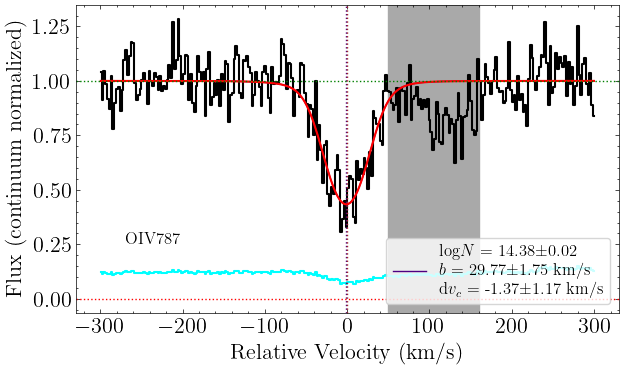

In [201]:
fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion
Now compile the OIV ion

In [202]:
oiv = ion(z_sys, 'OIV', [oiv_787_fuv])

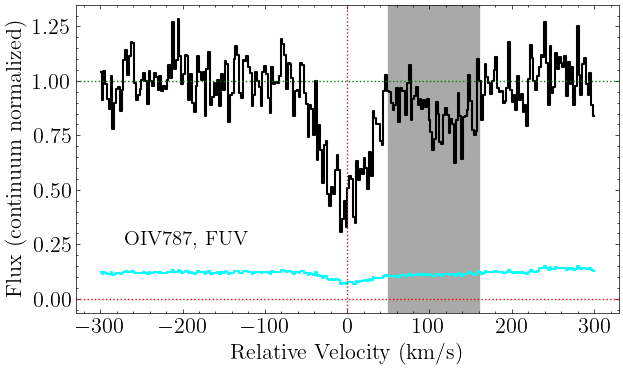

In [203]:
fig, axes = oiv.plot_ion()

In [204]:
oiv.init_ion([[[14.4, 30, 0]]])
#oiv.init_ion(np.array([[14.6,17,-1.45]]))

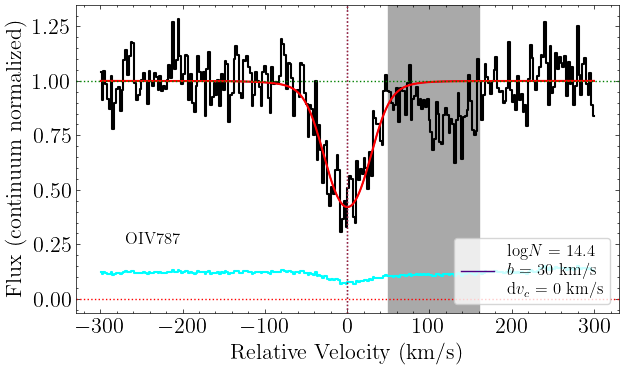

In [205]:
fig, axes = oiv.plot_ion_init_fit()

In [206]:
oiv.fit_ion(fix_params_list = ['it1c1_dv_c'])

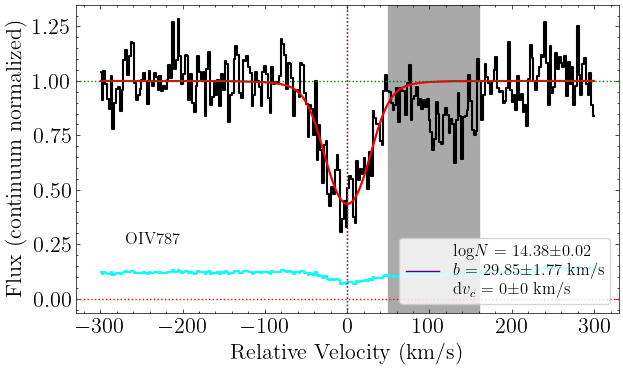

In [207]:
fig, axes = oiv.plot_ion_best_fit()

In [208]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
#oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [209]:
#fig, axes = oiv.plot_samples()

In [210]:
#oiv.plot_corner()

# OVI

## OVI 1031
Get OVI 1031 from COS FUV

In [211]:
ovi_1031_fuv = ion_transition('OVI', 1031, 'O', z_sys, 'FUV')

In [212]:
ovi_1031_fuv.grab_ion_transition_info()

In [213]:
ovi_1031_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-220],[120,200],[260,300]])

In [214]:
ovi_1031_fuv.cont_norm_flux(v_abs_range=[-120,120], degree=1)

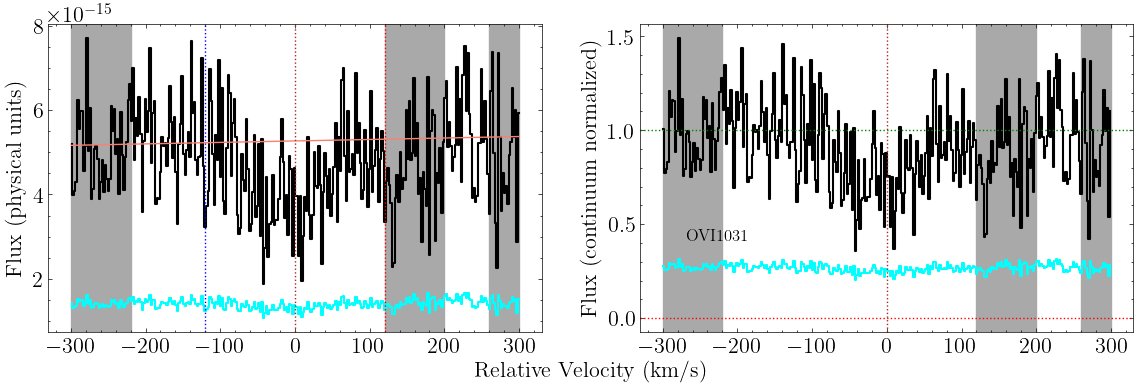

In [215]:
fig, ax = ovi_1031_fuv.plot_ion_transition_spec_cont()
#ax[0].axvline(100)

In [216]:
ovi_1031_fuv.cont_params

[5.267788764861151e-15, 3.4854614780088834e-19]

In [217]:
ovi_1031_fuv.get_EW_total(-120,120)

Integration window: [-120, 120]
EW, 1sig: 127, 20
EW-3sig: 59


In [218]:
ovi_1031_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [219]:
ovi_1031_fuv.init_ion_transition(init_values = np.array([[14.,60,0]]), 
                             lsf_convolve = True)

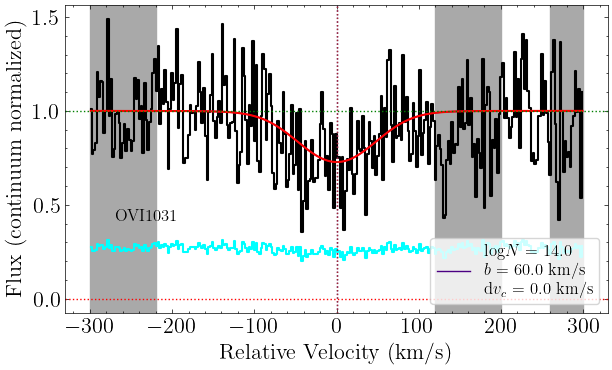

In [220]:
fig, ax = ovi_1031_fuv.plot_ion_transition_init_fit()

In [221]:
ovi_1031_fuv.fit_ion_transition()

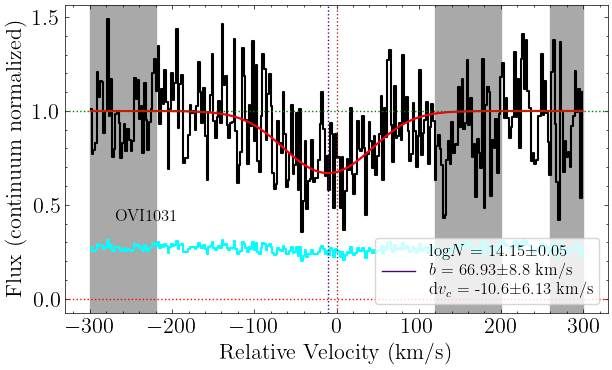

In [222]:
fig, ax = ovi_1031_fuv.plot_ion_transition_best_fit()

## OVI 1037

In [223]:
ovi_1037_fuv = ion_transition('OVI', 1037, 'O', z_sys, 'FUV')

In [224]:
ovi_1037_fuv.grab_ion_transition_info()

In [225]:
ovi_1037_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-260,-230],[190,300]])

In [226]:
ovi_1037_fuv.cont_norm_flux(v_abs_range=[-180,170], degree=1)

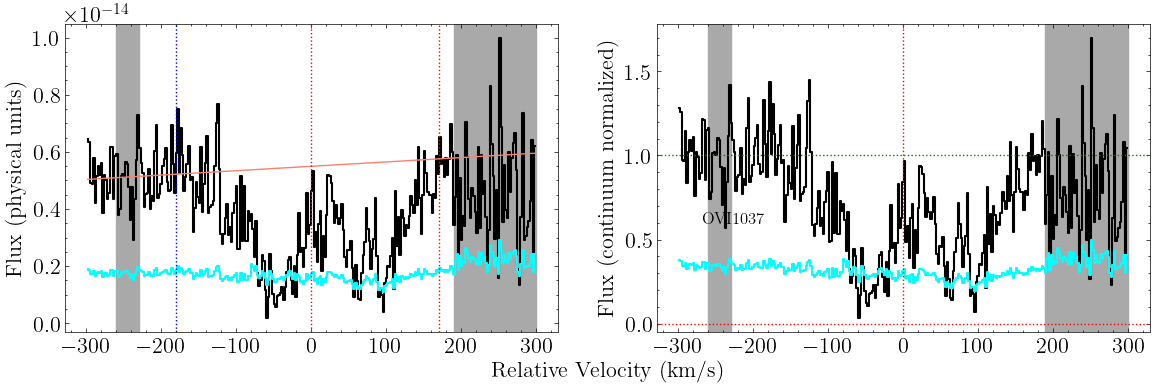

In [227]:
fig, ax = ovi_1037_fuv.plot_ion_transition_spec_cont()

In [228]:
ovi_1037_fuv.get_EW_total(-80,80)

Integration window: [-80, 80]
EW, 1sig: 300, 18
EW-3sig: 54


In [229]:
ovi_1037_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [230]:
ovi_1037_fuv.init_ion_transition(init_values = np.array([[14.17,76.0,0.0]]), 
                             lsf_convolve = True)

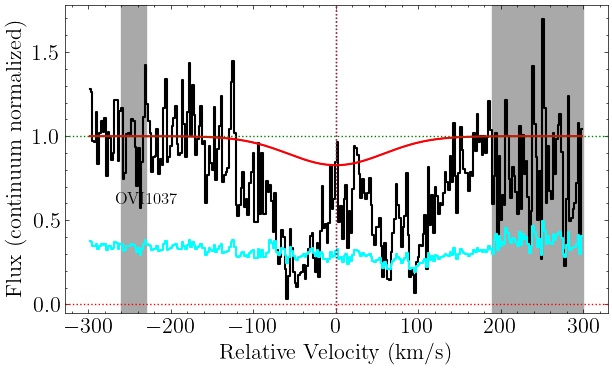

In [231]:
fig, ax = ovi_1037_fuv.plot_ion_transition_init_fit(legend=False)

## OVI ion
Now compile the OVI ion

In [232]:
ovi = ion(z_sys, 'OVI', [ovi_1031_fuv])

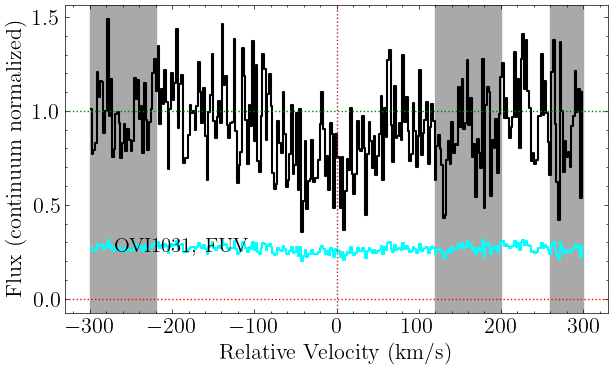

In [233]:
fig, axes = ovi.plot_ion()

In [234]:
ovi.init_ion([[[14.16, 68, 0]]])

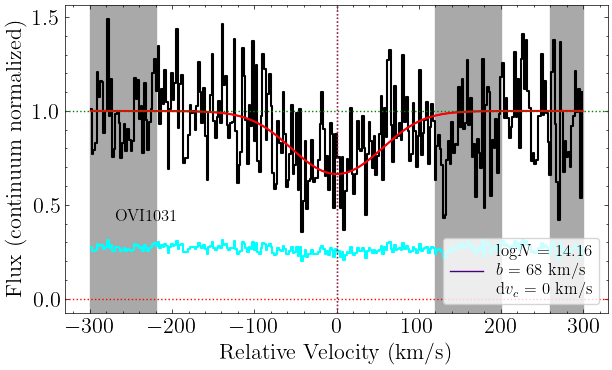

In [235]:
fig, axes = ovi.plot_ion_init_fit()

In [236]:
# For 1-component fit
ovi.fit_ion(upper_bounds_dict={'it1c1_b':130}, fix_params_list = ['it1c1_dv_c'])

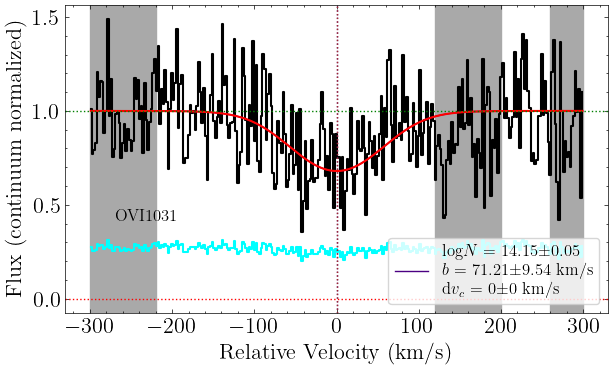

In [237]:
fig, axes = ovi.plot_ion_best_fit()

In [238]:
#ovi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#ovi.fit_ion_emcee(load=True, loaddir=rootdir)

In [239]:
#fig, axes = ovi.plot_samples()

In [240]:
#ovi.plot_corner()

# HI + CIII + OIII + OIV + OVI

In [241]:
hi_ciii_oiii_oiv_ovi = ion_suite(z_sys, 'HI+CIII+OIII+OIV+OVI', [hi, ciii, oiii, oiv, ovi])

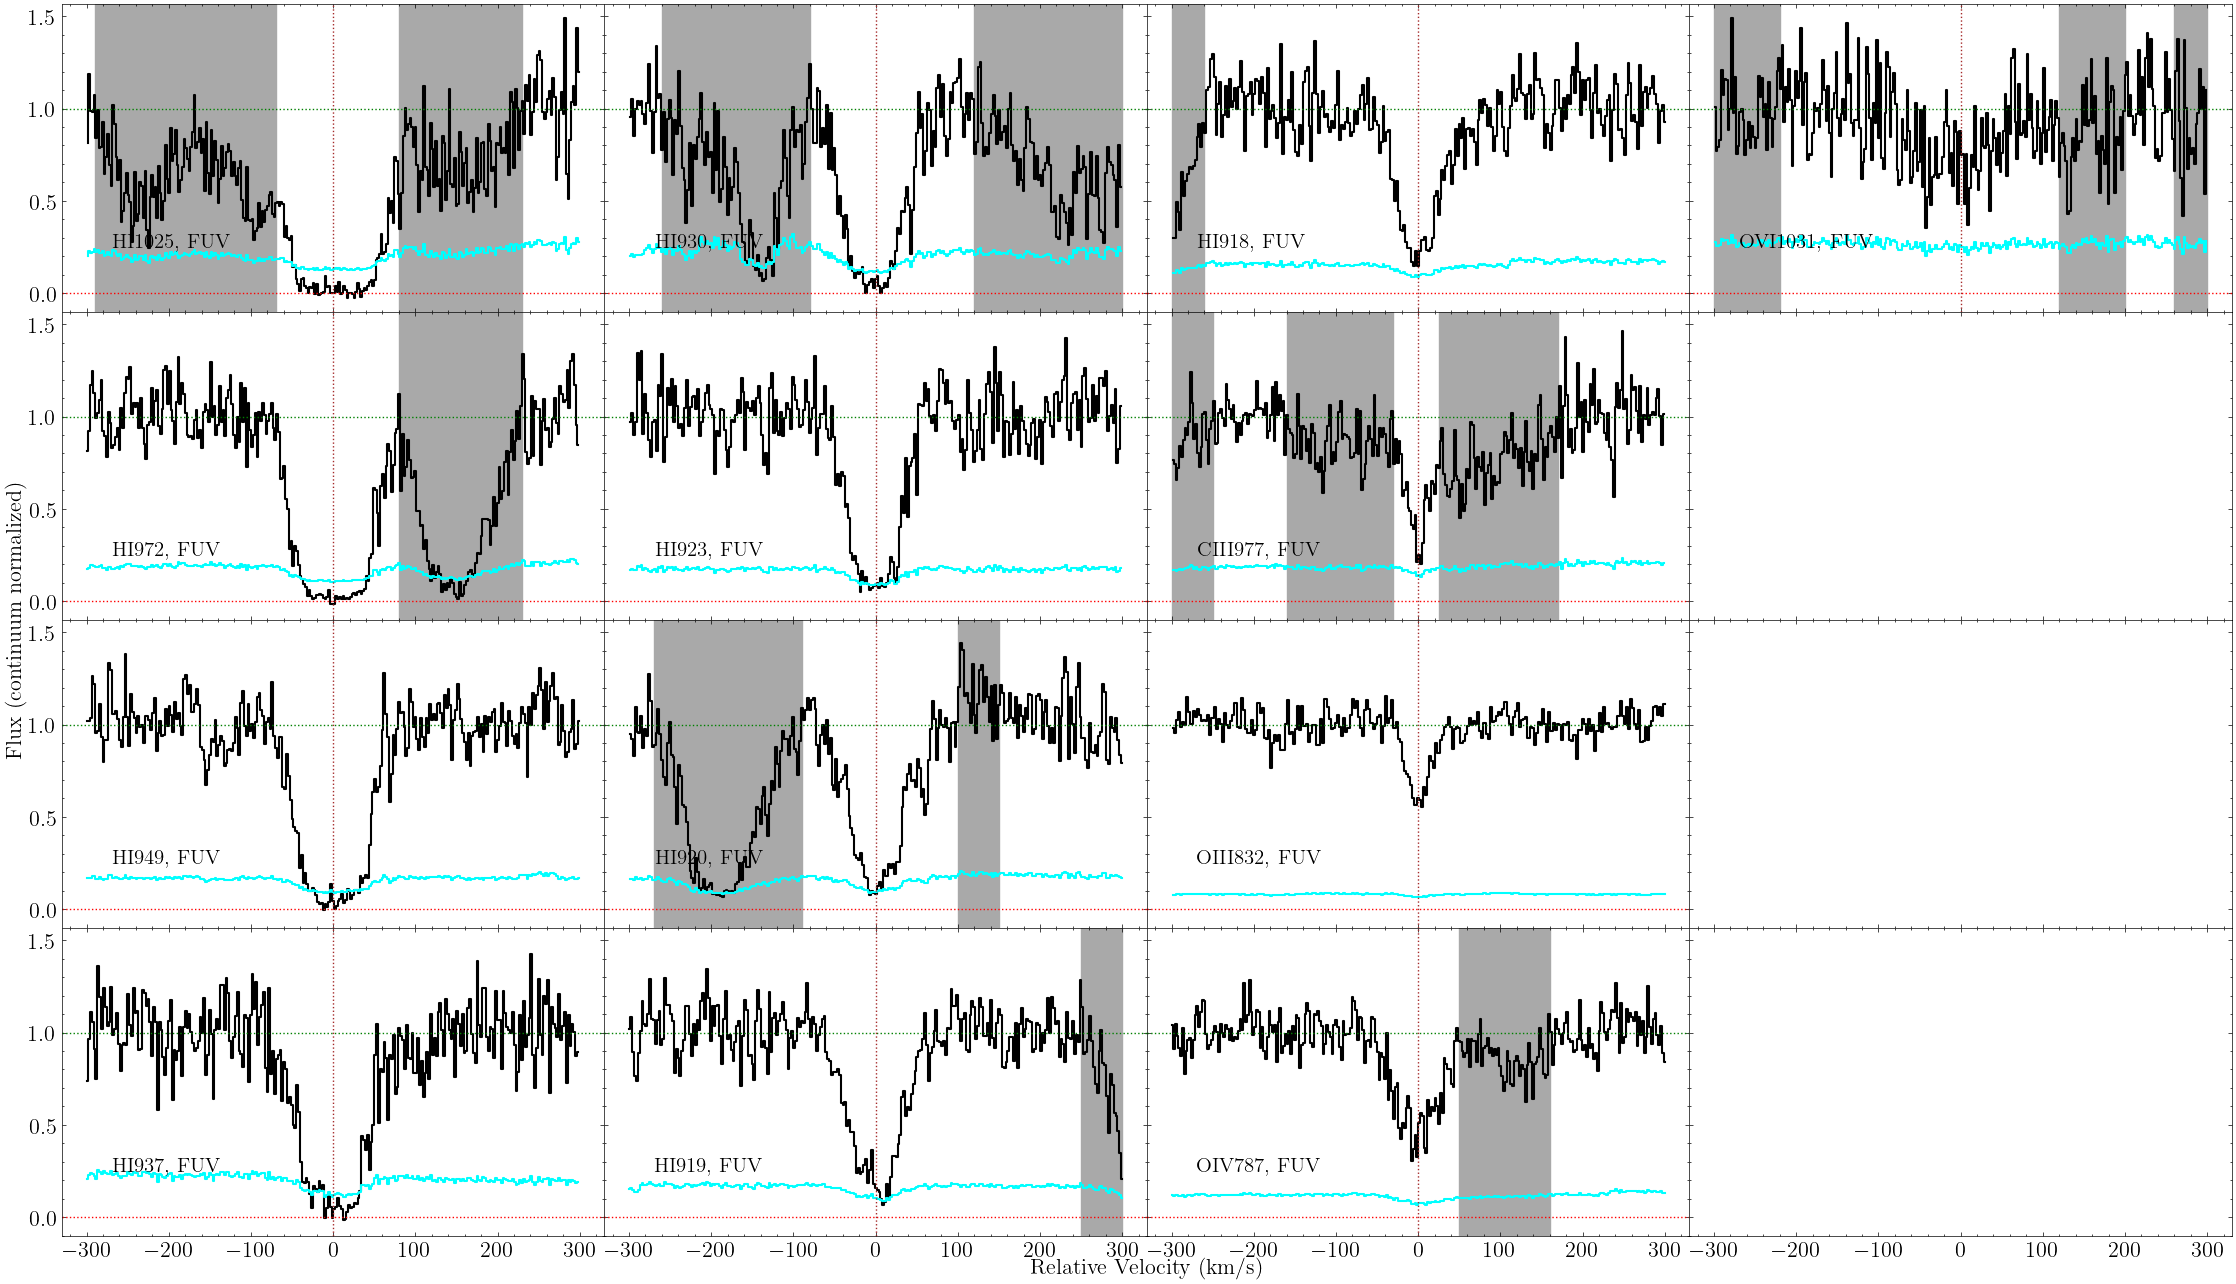

In [242]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite(n_cols=4)

In [243]:
hi_ciii_oiii_oiv_ovi.init_ion_suite([[[16.63, 25, 0]],  # HI
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],                           
                                  [[13.36, 14, 0]], # CIII
                                  [[13.96, 13, 0]], # OIII
                                  [[14.42, 30, 0]], # OIV
                                  [[14.02, 40, 0]], # OVI
                                    ] 
                                   ) 

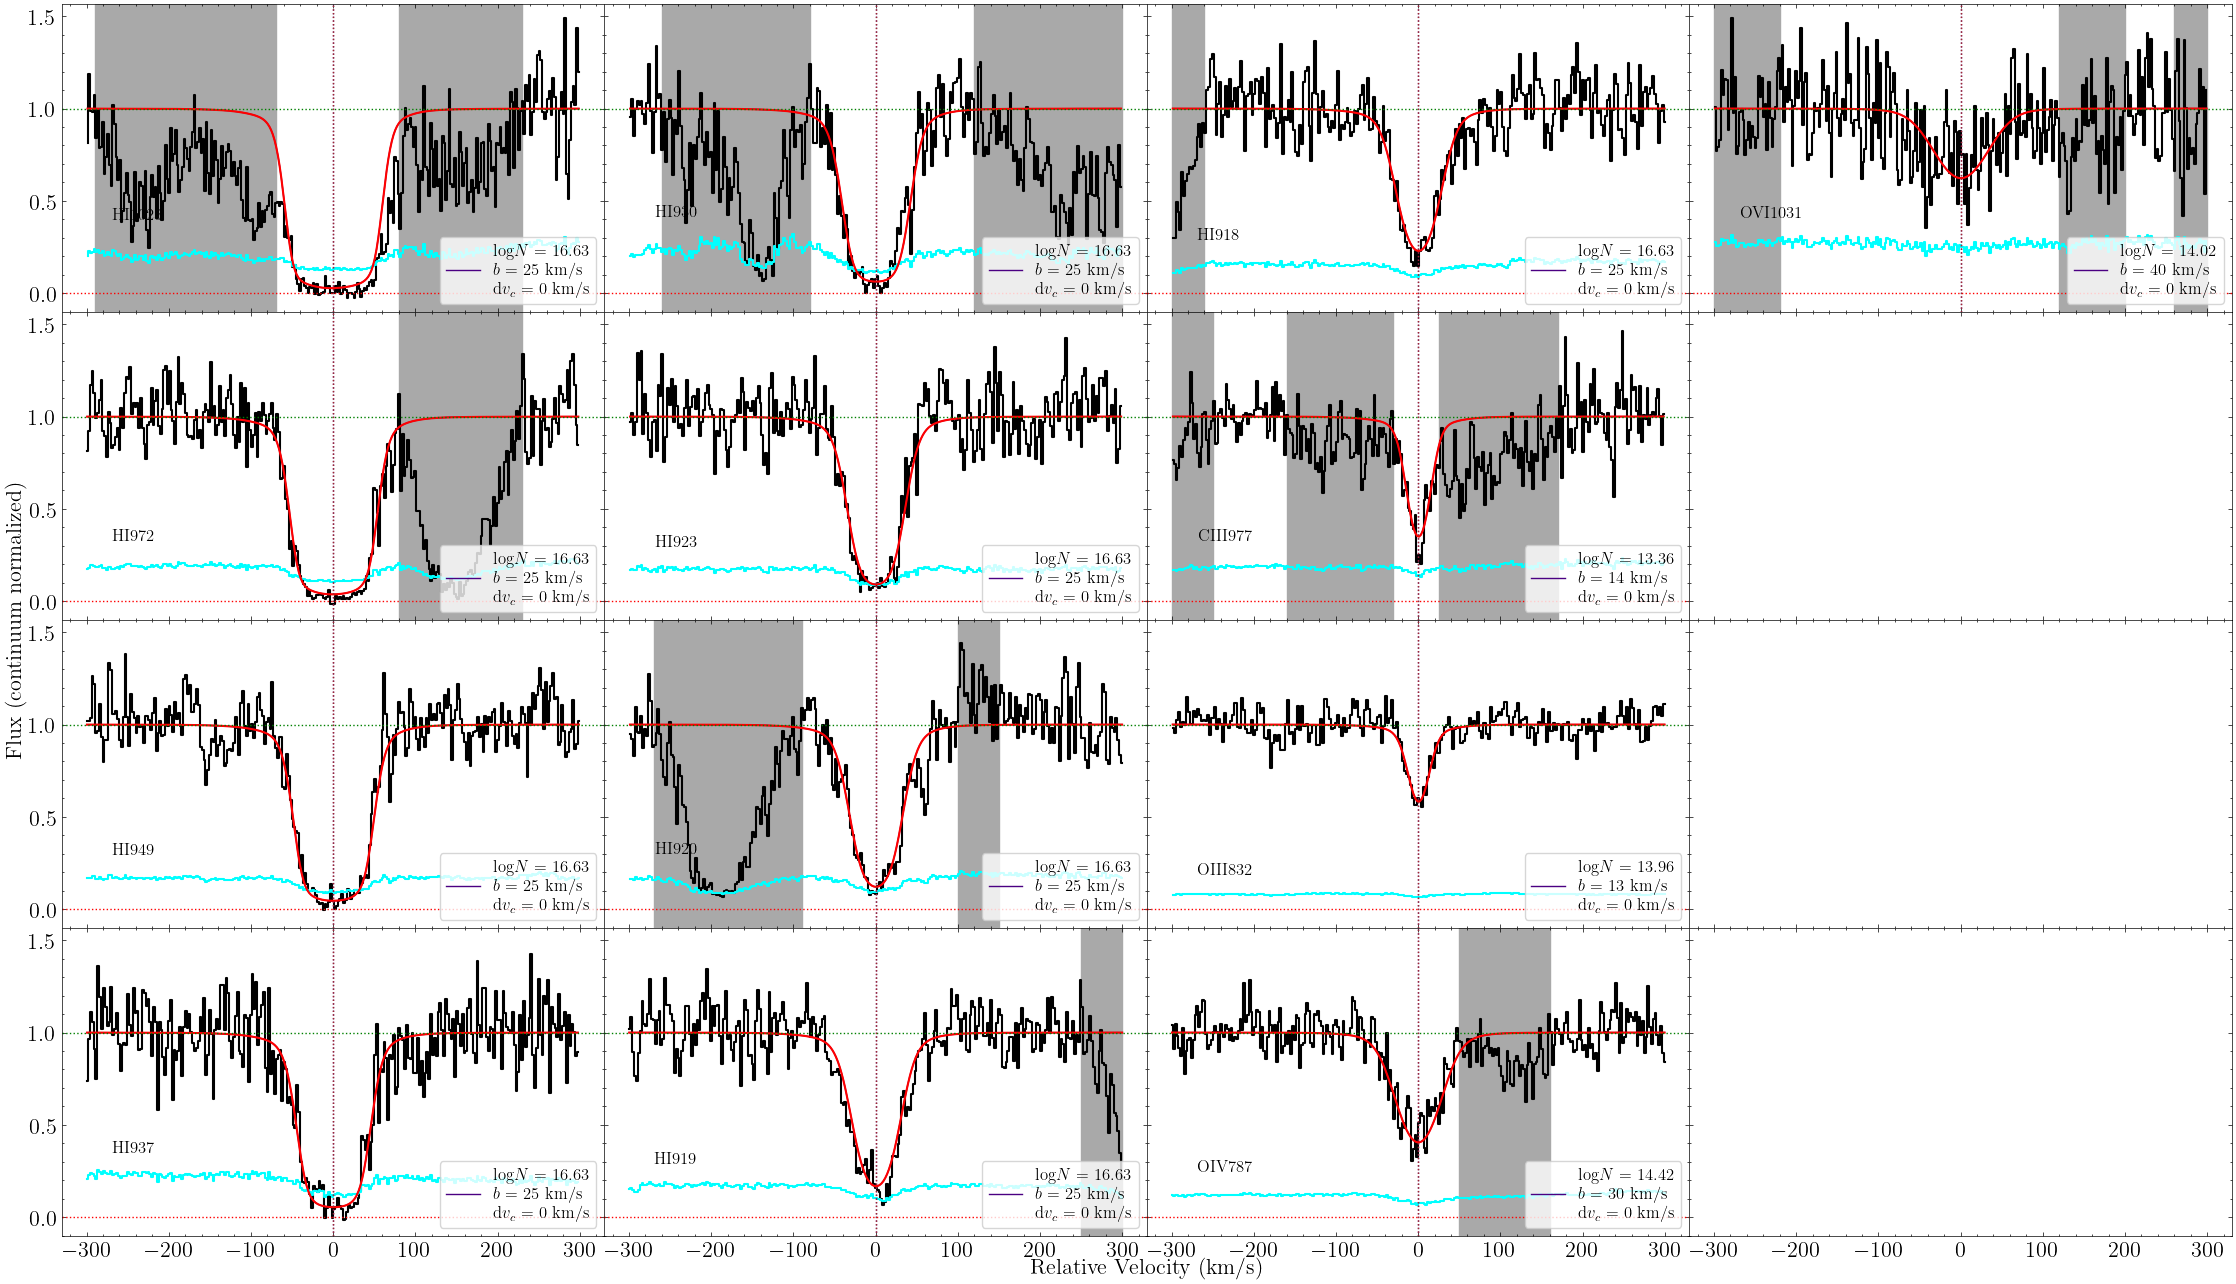

In [244]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite_init_fit(n_cols=4)

In [245]:
hi_ciii_oiii_oiv_ovi.fit_ion_suite(tie_params_list=[['it1c1_logN','it2c1_logN'], # Tie logN for HI transitions together
                                   ['it1c1_logN','it3c1_logN'],             
                                   ['it1c1_logN','it4c1_logN'],
                                   ['it1c1_logN','it5c1_logN'],
                                   ['it1c1_logN','it6c1_logN'],
                                   ['it1c1_logN','it7c1_logN'],
                                   ['it1c1_logN','it8c1_logN'],             
                                   ['it1c1_logN','it9c1_logN'],  
                                   ['it1c1_b','it2c1_b'], # Tie b for HI transitions together
                                   ['it1c1_b','it3c1_b'],             
                                   ['it1c1_b','it4c1_b'],
                                   ['it1c1_b','it5c1_b'],
                                   ['it1c1_b','it6c1_b'],
                                   ['it1c1_b','it7c1_b'],
                                   ['it1c1_b','it8c1_b'],             
                                   ['it1c1_b','it9c1_b'],  
                                   ['it1c1_dv_c','it2c1_dv_c'], # Tie all centroids together
                                   ['it1c1_dv_c','it3c1_dv_c'],
                                   ['it1c1_dv_c','it4c1_dv_c'],
                                   ['it1c1_dv_c','it5c1_dv_c'],
                                   ['it1c1_dv_c','it6c1_dv_c'],
                                   ['it1c1_dv_c','it7c1_dv_c'],                                               
                                   ['it1c1_dv_c','it8c1_dv_c'],                                               
                                   ['it1c1_dv_c','it9c1_dv_c'],       
                                   ['it1c1_dv_c','it10c1_dv_c'],                                                
                                   ['it1c1_dv_c','it11c1_dv_c'],     
                                   ['it1c1_dv_c','it12c1_dv_c'],
                                   ['it1c1_dv_c','it13c1_dv_c']],
                                  lower_bounds_dict = {'it10c1_b':8},
                                  upper_bounds_dict = {'it13c1_b':130})

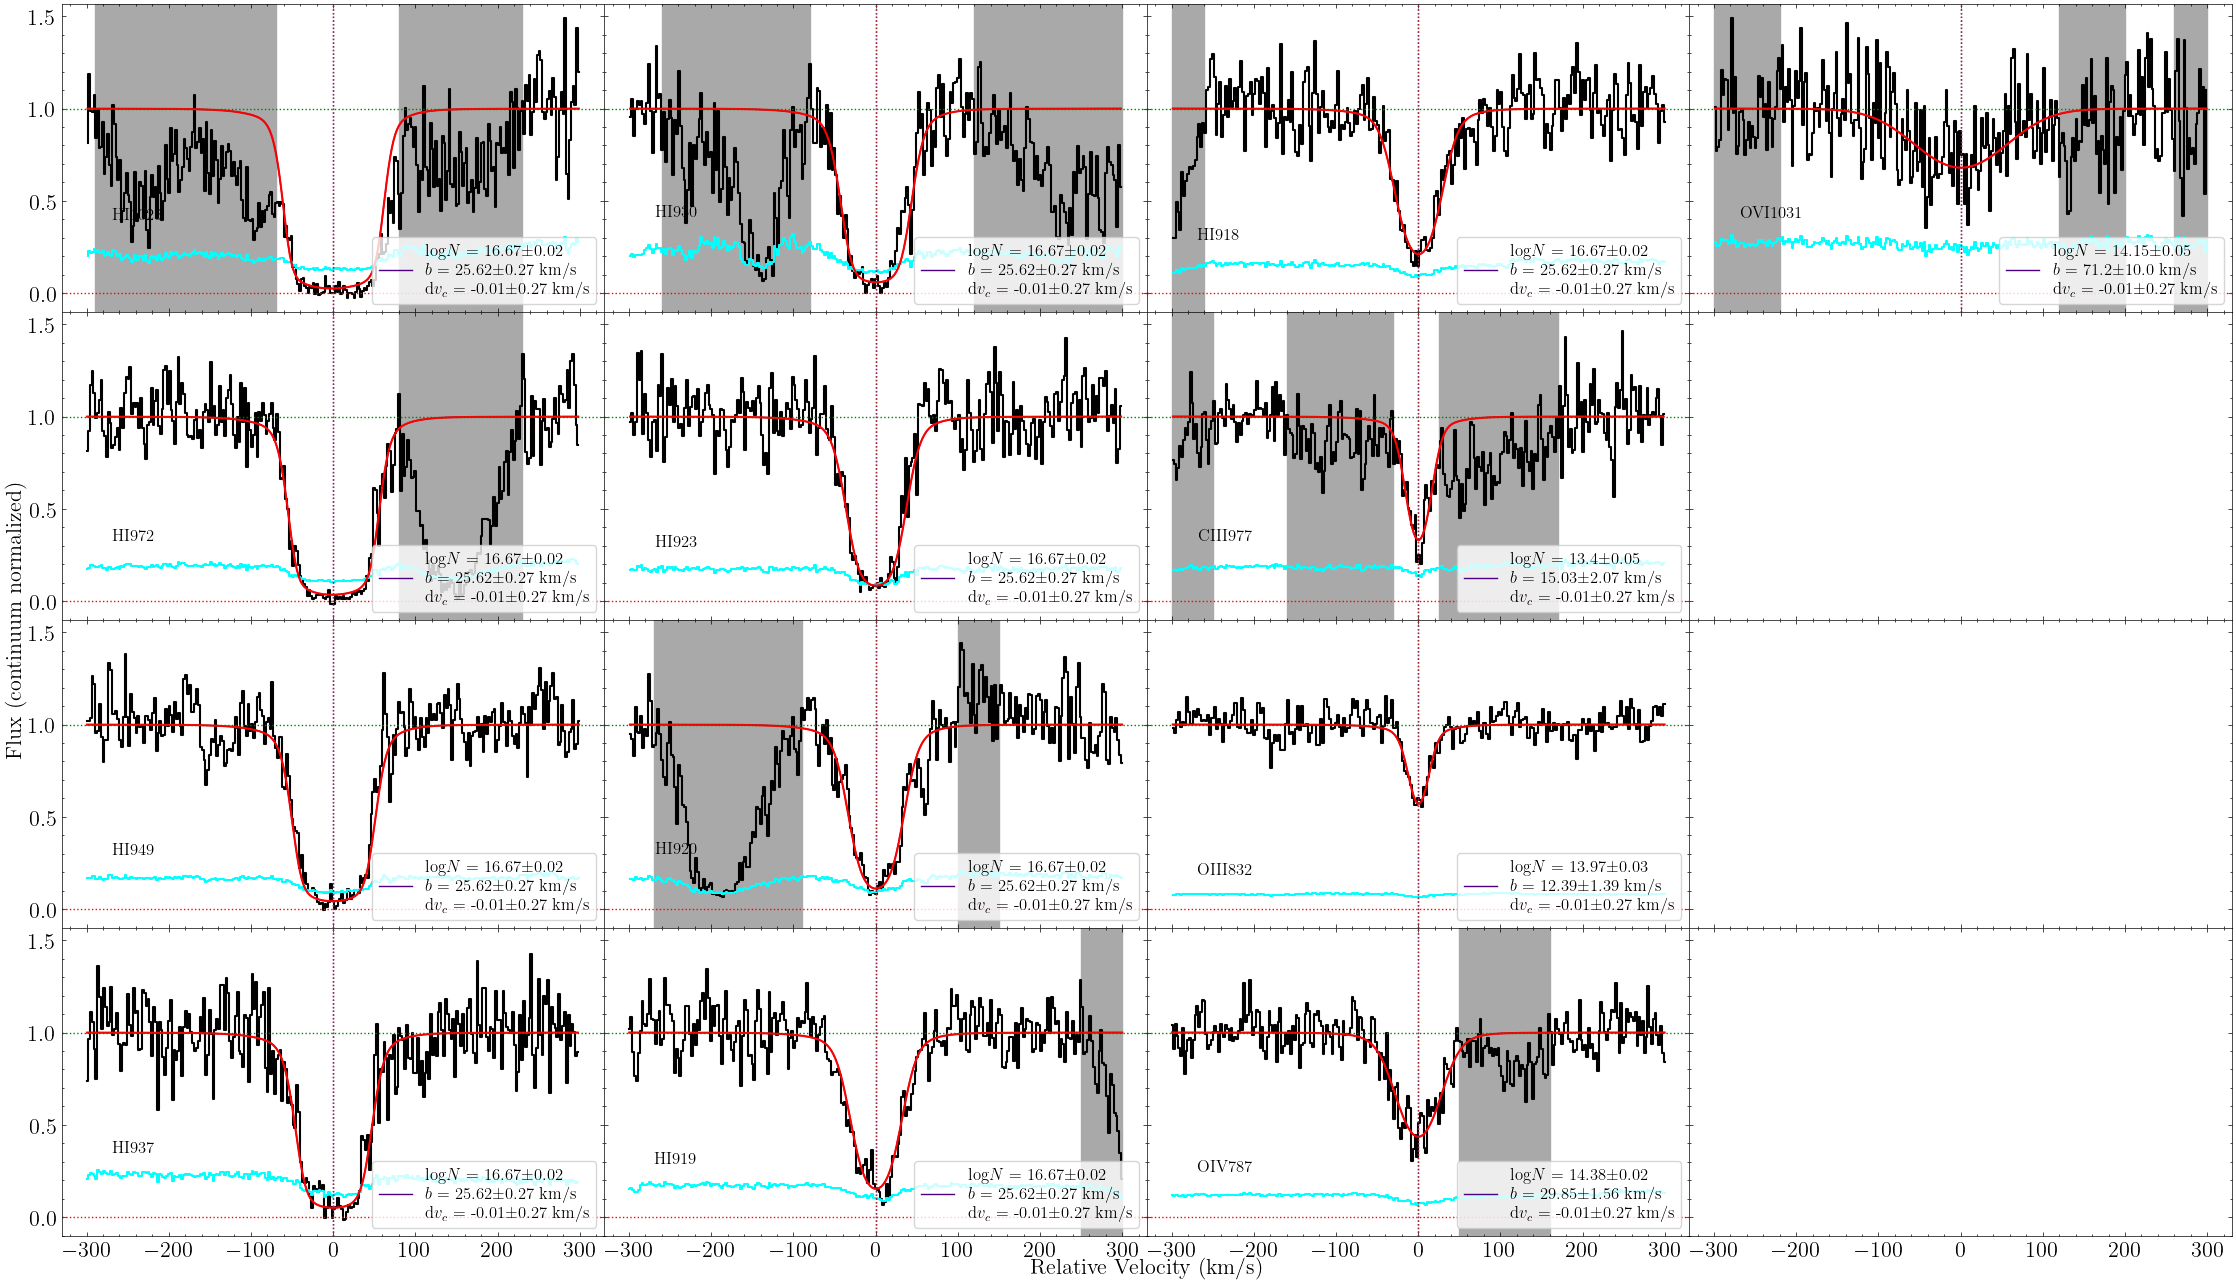

In [246]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite_best_fit(n_cols=4)

In [247]:
#hi_ciii_oiii_oiv_ovi.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-7, n_steps=5000)
hi_ciii_oiii_oiv_ovi.fit_ion_suite_emcee(load=True, loaddir=rootdir)

In [248]:
#hi_ciii_oiii_oiv_ovi.plot_corner()

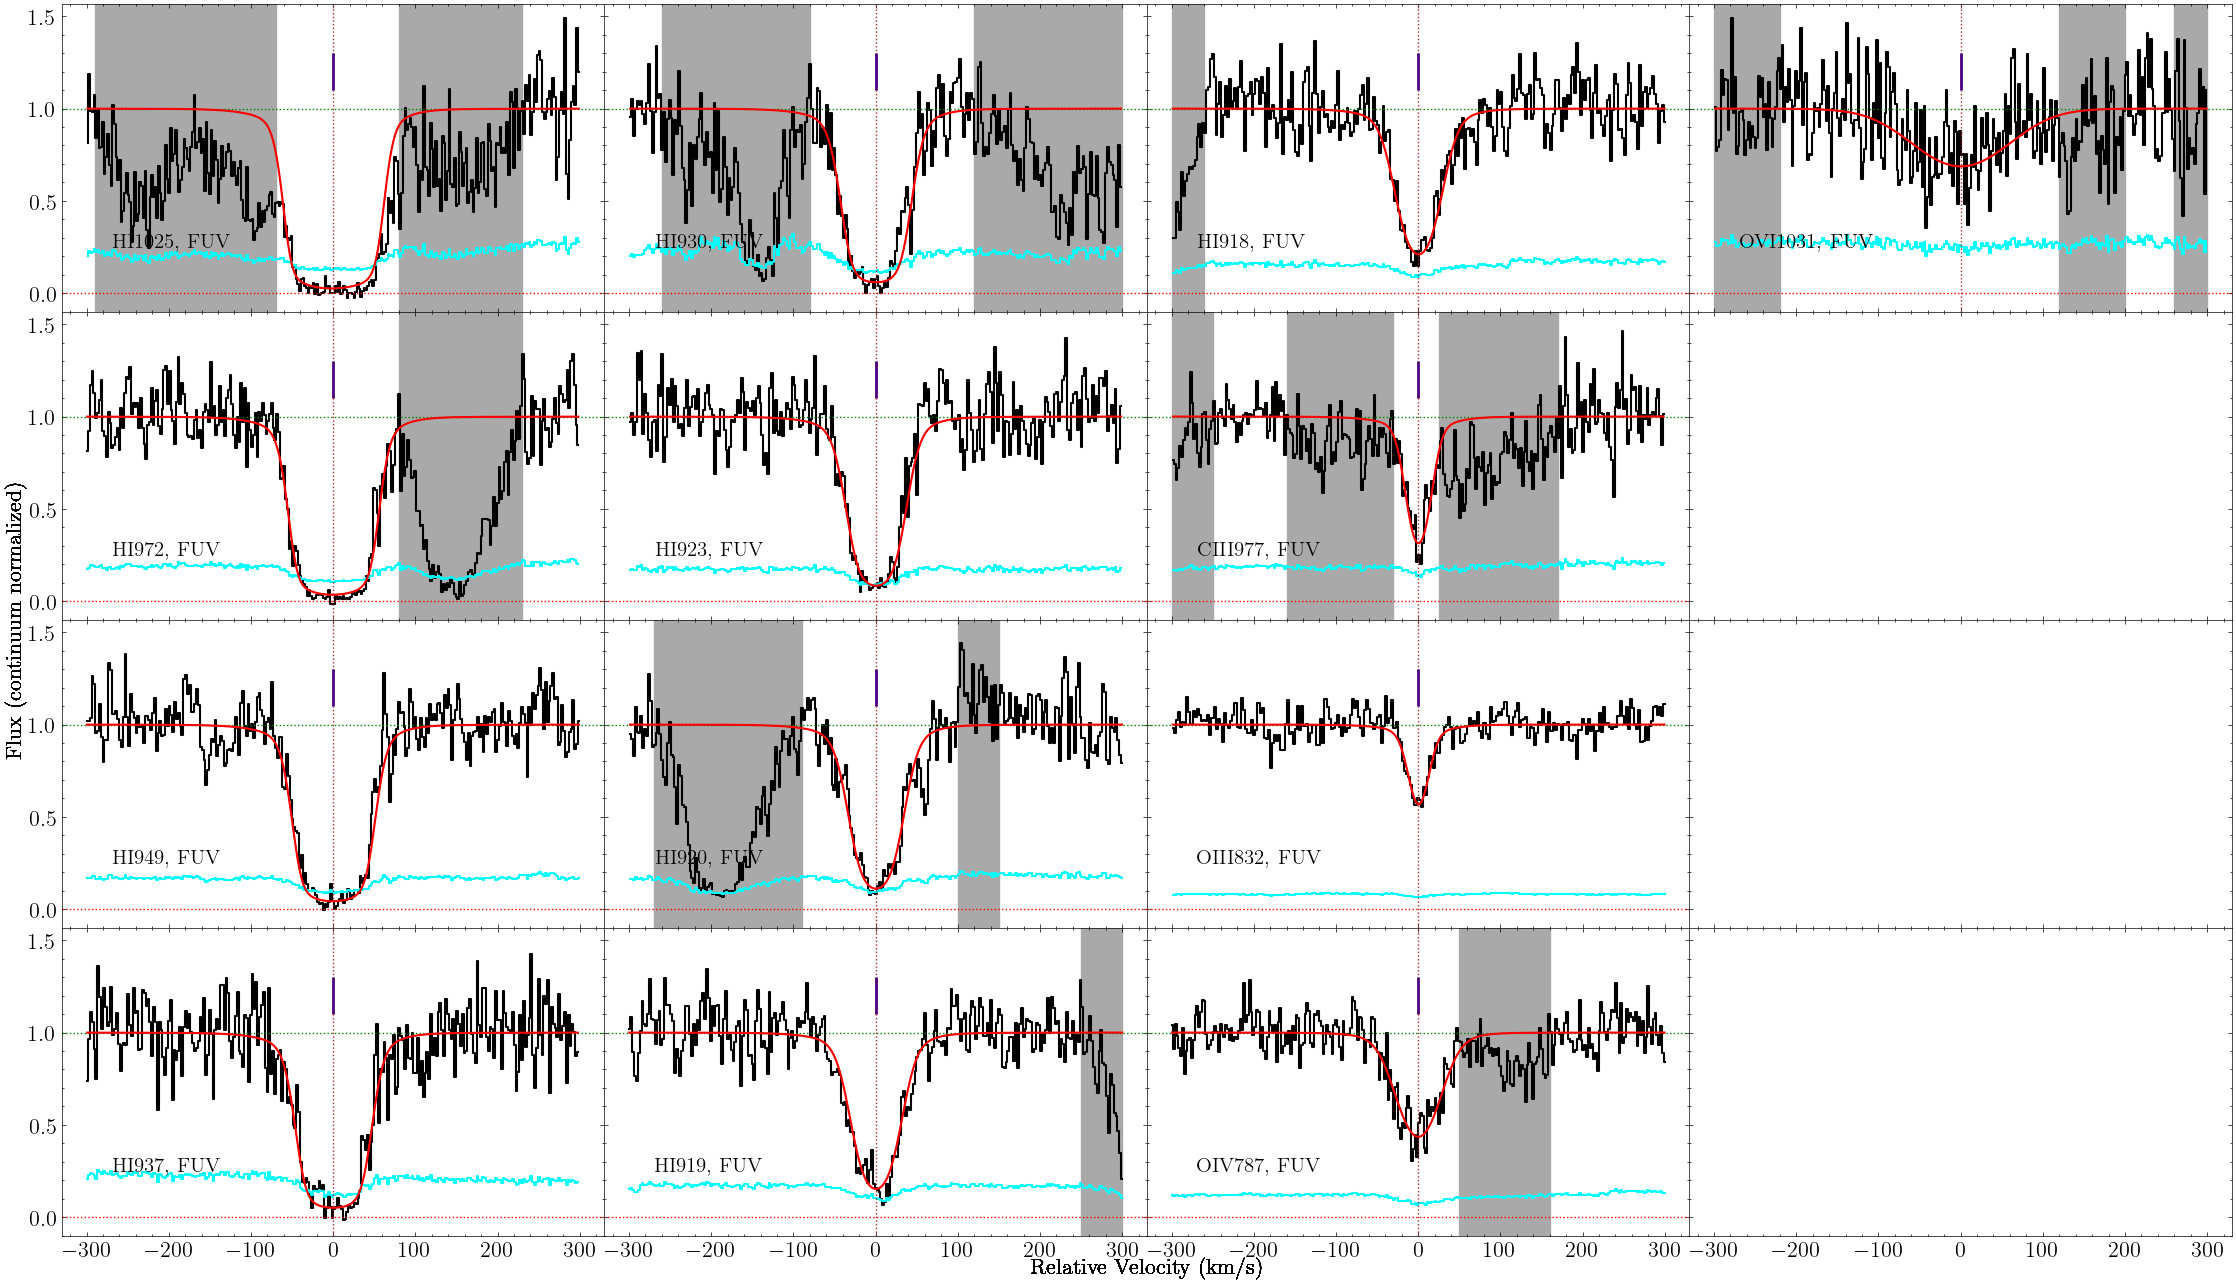

In [249]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_samples(n_cols=4)

In [250]:
#np.percentile(hi_ciii_oiii_oiv_ovi.result_emcee.flatchain['it10c1_b'], 100*cdf_3sig)

# CIV

## CIV 1548 (STIS)

In [251]:
civ_1548_stis = ion_transition('CIV', 1548, 'C', z_sys, 'STIS')

In [252]:
civ_1548_stis.grab_ion_transition_info()

In [253]:
civ_1548_stis.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-180,-80]])

In [254]:
civ_1548_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

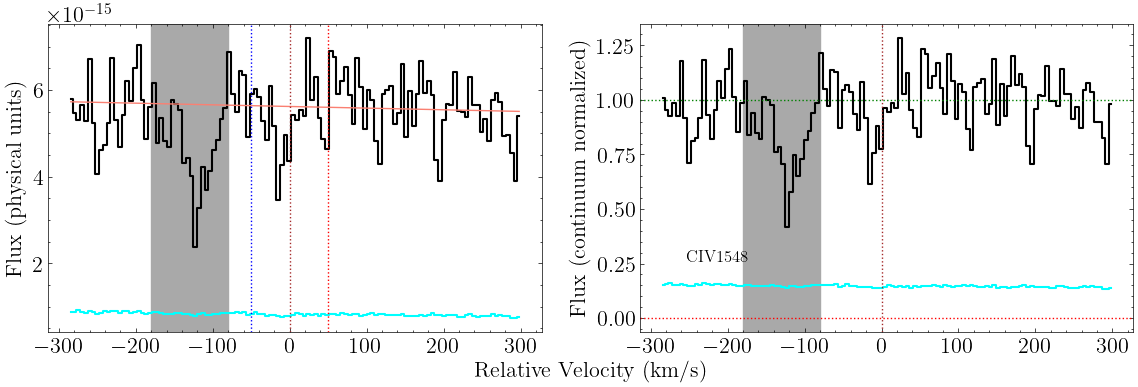

In [255]:
fig, ax = civ_1548_stis.plot_ion_transition_spec_cont()

In [256]:
civ_1548_stis.grab_ion_transition_lsf(lsf_fits_list)

In [257]:
civ_1548_stis.get_EW_total(-50,50)

Integration window: [-50, 50]
EW, 1sig: 23, 16
EW-3sig: 49


In [372]:
civ_1548_stis.get_upper_lim(30)

logN-1sig: 10.5
logN-2sig: 12.3
logN-3sig: 12.8


In [373]:
civ_1548_stis.init_ion_transition(init_values = np.array([[12.8,30,0]]), 
                             lsf_convolve = True)

## CIV 1550 (STIS)

In [374]:
civ_1550_stis = ion_transition('CIV', 1550, 'C', z_sys, 'STIS')

In [375]:
civ_1550_stis.grab_ion_transition_info()

In [376]:
civ_1550_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-120,-80]])

In [377]:
civ_1550_stis.cont_norm_flux(v_abs_range=[-45,40], degree=1)

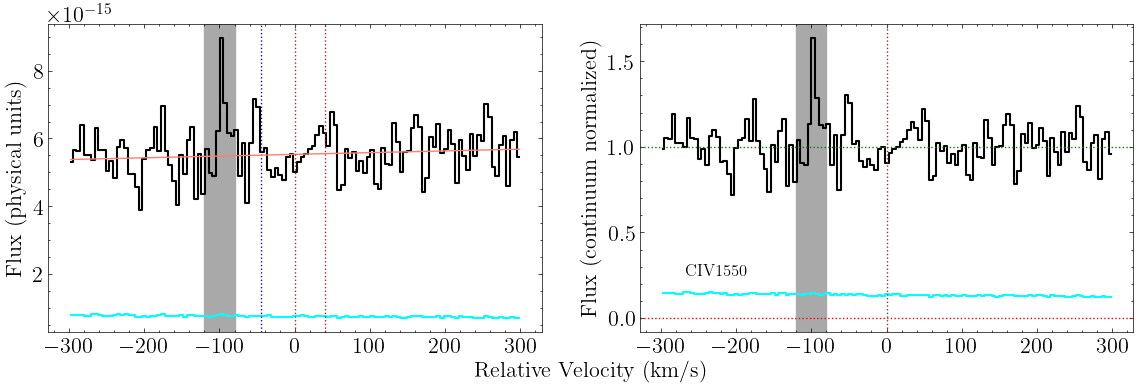

In [378]:
fig, ax = civ_1550_stis.plot_ion_transition_spec_cont()

In [379]:
civ_1550_stis.grab_ion_transition_lsf(lsf_fits_list)

In [380]:
civ_1550_stis.get_upper_lim(30)

logN-1sig: 10.8
logN-2sig: 12.6
logN-3sig: 13.1


In [381]:
civ_1550_stis.init_ion_transition(init_values = np.array([[13.1,30,0]]), 
                             lsf_convolve = True)

# Summary List
Now compile a summary list

In [382]:
summary = ion_summary([hi_ciii_oiii_oiv_ovi])

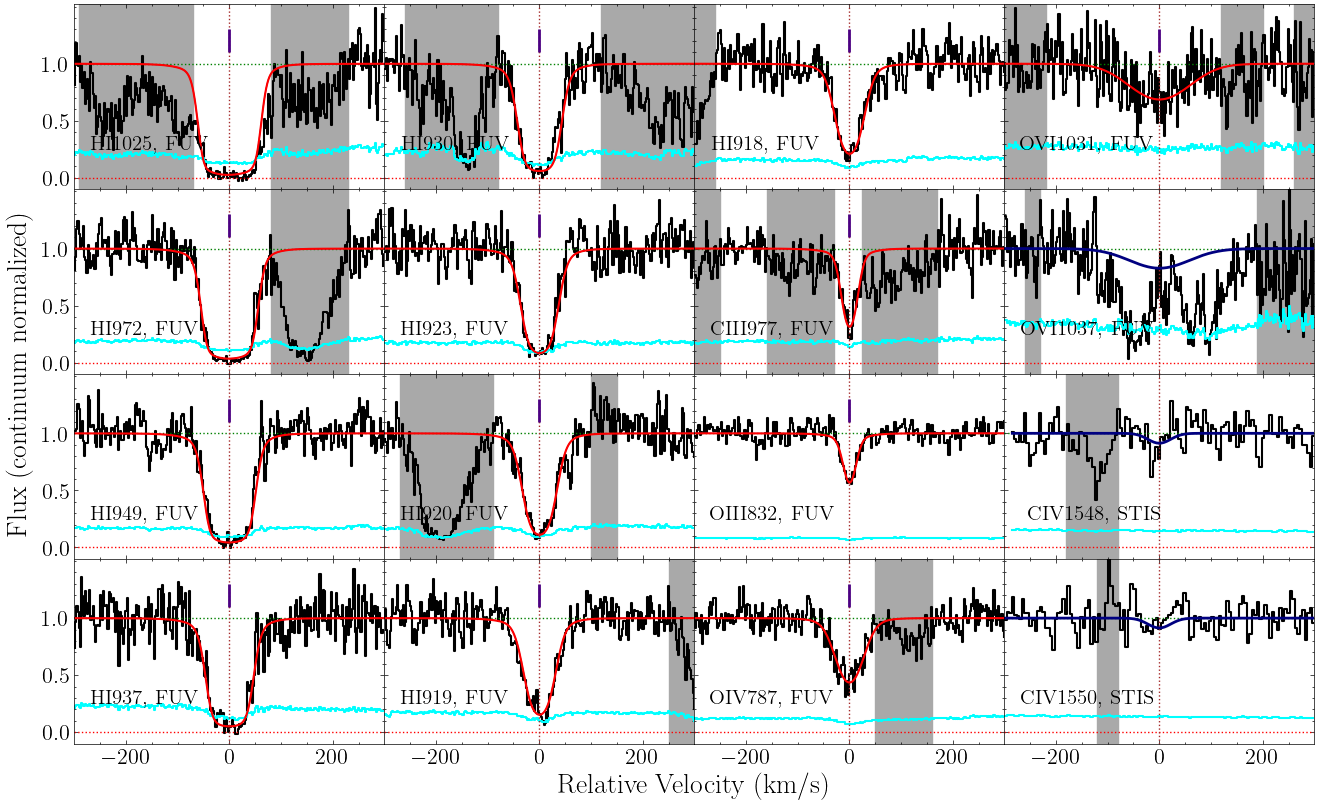

In [383]:
fig, axes = plt.subplots(4, 4, figsize=(4*4, 2.4*4), sharex=True, sharey=True)

summary.plot_samples(fig = fig, axes=axes, n_cols=4)

ovi_1037_fuv.plot_ion_transition_spec(fig=fig, ax=axes[1,3], draw_cont_bounds=False, label_axes=False)
axes[1,3].plot(ovi_1037_fuv.v, ovi_1037_fuv.init_total_flux, color='navy', lw=2)

civ_1548_stis.plot_ion_transition_spec(fig=fig, ax=axes[2,3], draw_cont_bounds=False, label_axes=False)
axes[2,3].plot(civ_1548_stis.v, civ_1548_stis.init_total_flux, color='navy', lw=2)

civ_1550_stis.plot_ion_transition_spec(fig=fig, ax=axes[3,3], draw_cont_bounds=False, label_axes=False)
axes[3,3].plot(civ_1550_stis.v, civ_1550_stis.init_total_flux, color='navy', lw=2)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

plt.savefig(rootdir+'Ions/z={}/z={}_vp.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [384]:
summary.print_summary()

HI1025
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI972
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI949
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI937
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI930
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI923
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI920
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI919
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
HI918
dv_c = -0.0 \pm 0.4, logN = 16.67 \pm 0.02, b = 25.6 \pm 0.4
CIII977
dv_c = -0.0 \pm 0.4, logN = 13.42 \pm 0.09, b = 14.7_{-3.3}^{+3.7}
OIII832
dv_c = -0.0 \pm 0.4, logN = 13.97 \pm 0.04, b = 12.3 \pm 1.7
OIV787
dv_c = -0.0 \pm 0.4, logN = 14.38 \pm 0.02, b = 30.0_{-1.9}^{+2.0}
OVI1031
dv_c = -0.0 \pm 0.4, logN = 14.16 \pm 0.07, b = 75.1_{-13.2}^{+16.6}


# CII

## CII 903.9

In [293]:
cii_904_fuv = ion_transition('CII', 903.9, 'C', z_sys, 'FUV')

In [294]:
cii_904_fuv.grab_ion_transition_info()

In [295]:
cii_904_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-220,-120],[180,300]])

In [296]:
cii_904_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

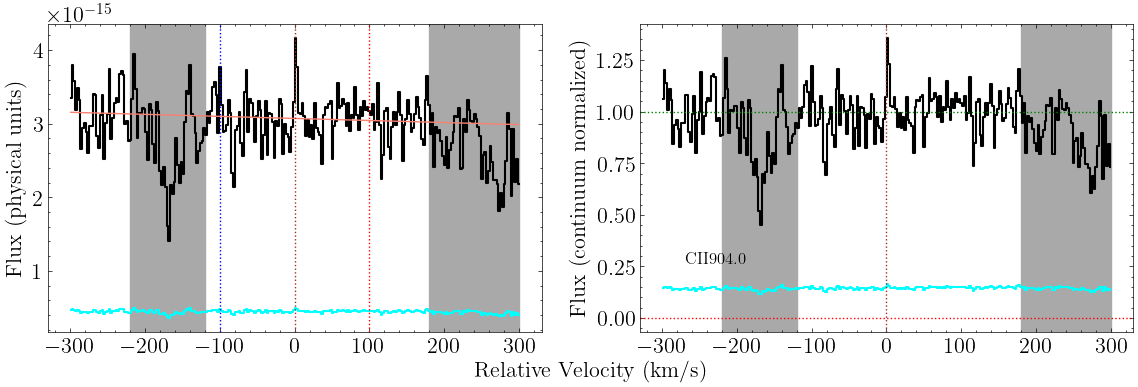

In [297]:
fig, ax = cii_904_fuv.plot_ion_transition_spec_cont()

In [298]:
cii_904_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [299]:
cii_904_fuv.init_ion_transition(init_values = np.array([[14,13.8,0]]), 
                             lsf_convolve = True)

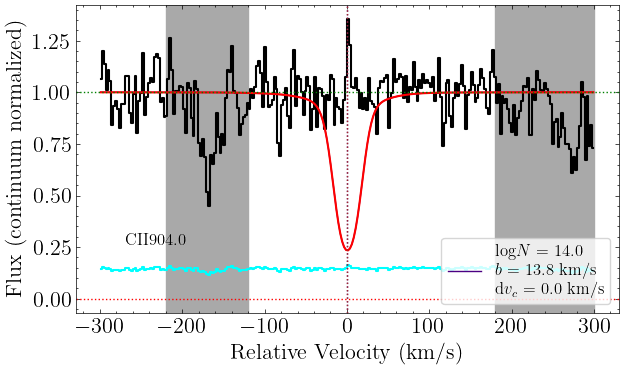

In [300]:
fig, ax = cii_904_fuv.plot_ion_transition_init_fit()

In [385]:
cii_904_fuv.get_upper_lim(10)

logN-1sig: 10.3
logN-2sig: 12.1
logN-3sig: 12.6


## CII 903.6

In [303]:
cii_903_fuv = ion_transition('CII', 903.6, 'C', z_sys, 'FUV')

In [304]:
cii_903_fuv.grab_ion_transition_info()

In [305]:
cii_903_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-100,0]])

In [306]:
cii_903_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

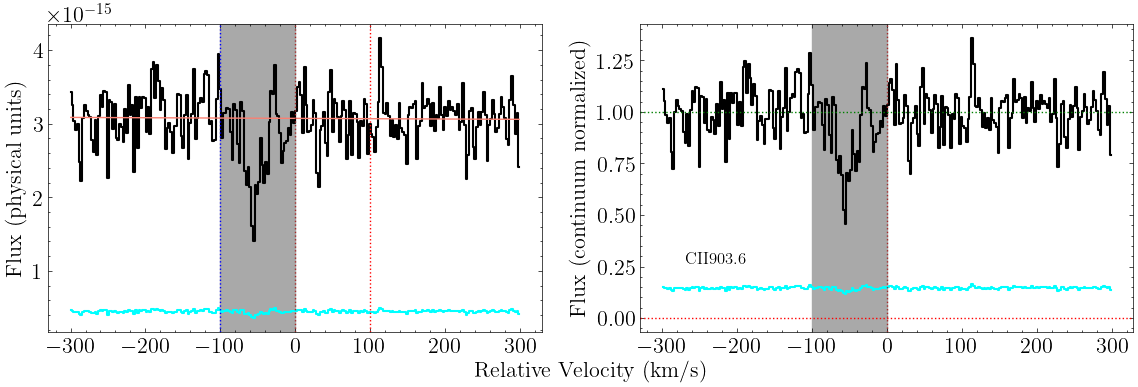

In [307]:
fig, ax = cii_903_fuv.plot_ion_transition_spec_cont()

In [308]:
cii_903_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [309]:
cii_903_fuv.init_ion_transition(init_values = np.array([[14,13.8,0]]), 
                             lsf_convolve = True)

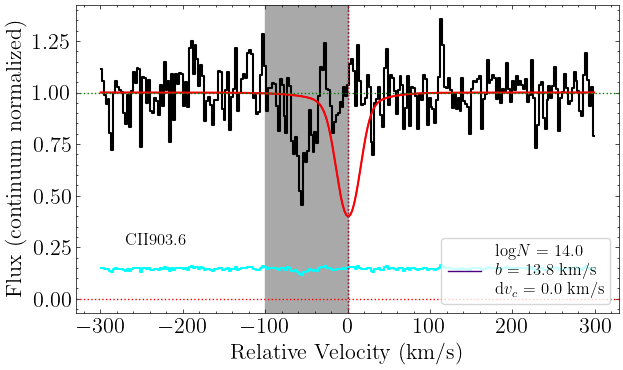

In [310]:
fig, ax = cii_903_fuv.plot_ion_transition_init_fit()

In [311]:
cii_903_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [386]:
cii_903_fuv.get_upper_lim(10)

logN-1sig: 10.6
logN-2sig: 12.3
logN-3sig: 12.9


## CII 1334 (STIS)

In [313]:
cii_1334_stis = ion_transition('CII', 1334, 'C', z_sys, 'STIS')

In [314]:
cii_1334_stis.grab_ion_transition_info()

In [315]:
cii_1334_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-190,0],[125,300]])

In [316]:
cii_1334_stis.cont_norm_flux(v_abs_range=[-100,50], degree=1)

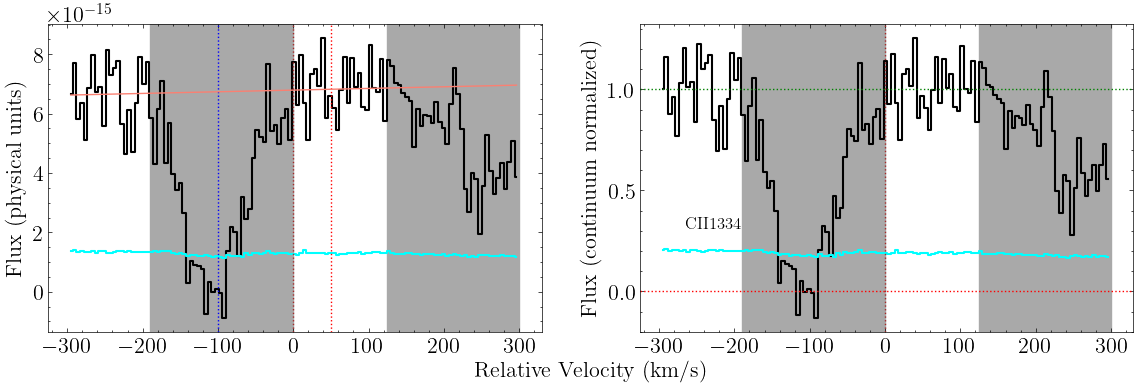

In [317]:
fig, ax = cii_1334_stis.plot_ion_transition_spec_cont()

In [318]:
cii_1334_stis.grab_ion_transition_lsf(lsf_fits_list)

In [387]:
cii_1334_stis.get_upper_lim(10)

logN-1sig: 10.7
logN-2sig: 12.4
logN-3sig: 13.0


## CII 1036

In [320]:
cii_1036_fuv = ion_transition('CII', 1036, 'C', z_sys, 'FUV')

In [321]:
cii_1036_fuv.grab_ion_transition_info()

In [322]:
cii_1036_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[200,300]])

In [323]:
cii_1036_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

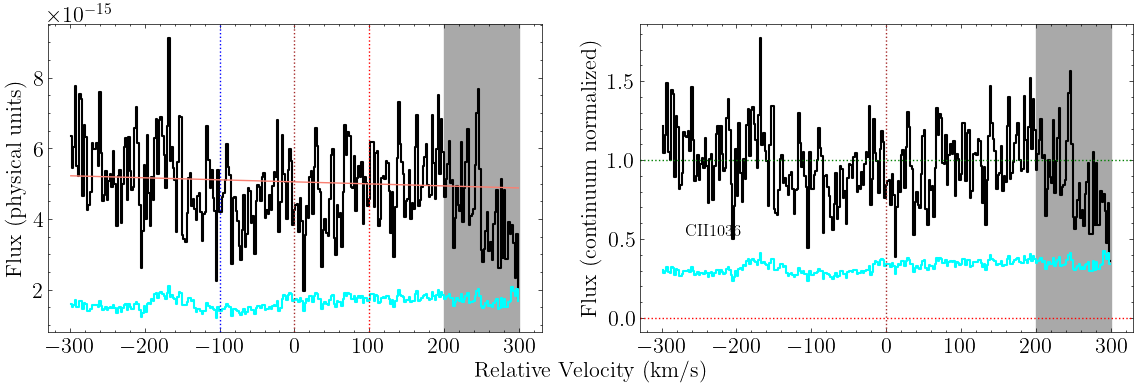

In [324]:
fig, ax = cii_1036_fuv.plot_ion_transition_spec_cont()

In [325]:
cii_1036_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [388]:
cii_1036_fuv.get_upper_lim(10)

logN-1sig: 11.0
logN-2sig: 12.8
logN-3sig: 13.3


# NII

## NII 1083 (NUV)

In [327]:
nii_1083_nuv = ion_transition('NII', 1083, 'N', z_sys, 'NUV')

In [328]:
nii_1083_nuv.grab_ion_transition_info()

In [329]:
nii_1083_nuv.grab_ion_transition_spec(spec_fits_list)

In [330]:
nii_1083_nuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

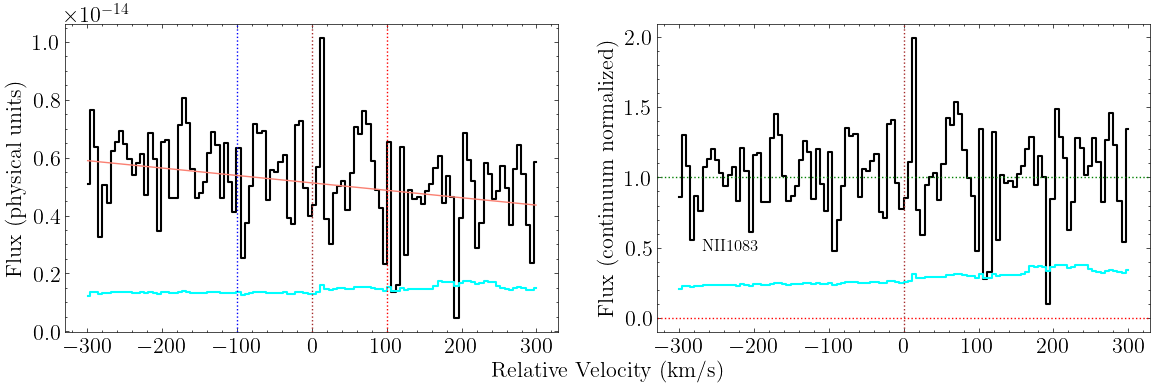

In [331]:
fig, ax = nii_1083_nuv.plot_ion_transition_spec_cont()

In [332]:
nii_1083_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [333]:
nii_1083_nuv.init_ion_transition(init_values = np.array([[14.0,39,0]]), 
                             lsf_convolve = True)

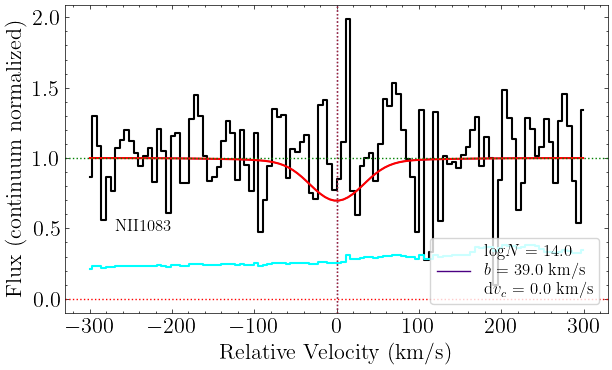

In [334]:
fig, ax = nii_1083_nuv.plot_ion_transition_init_fit()

In [389]:
nii_1083_nuv.get_upper_lim(10)

logN-1sig: 11.1
logN-2sig: 13.0
logN-3sig: 13.5


# NIII

## NIII 989

In [336]:
niii_989_fuv = ion_transition('NIII', 989, 'N', z_sys, 'FUV')

In [337]:
niii_989_fuv.grab_ion_transition_info()

In [338]:
niii_989_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-270],[270,300]])

In [339]:
niii_989_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

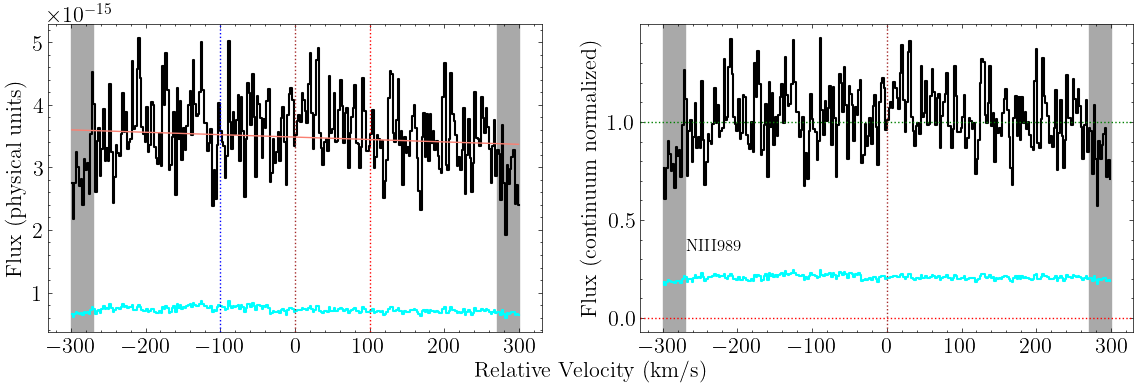

In [340]:
fig, ax = niii_989_fuv.plot_ion_transition_spec_cont()

In [341]:
niii_989_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [342]:
niii_989_fuv.init_ion_transition(init_values = np.array([[14.5,39,0]]), 
                             lsf_convolve = True)

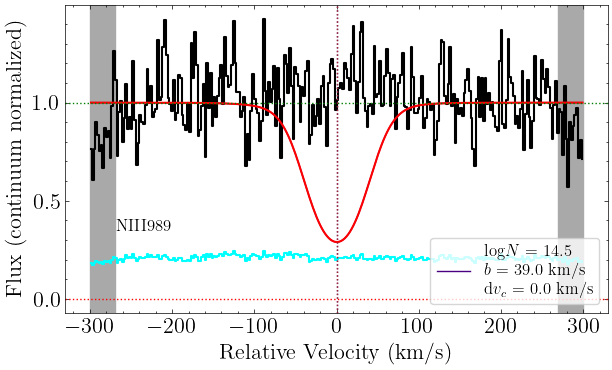

In [343]:
fig, ax = niii_989_fuv.plot_ion_transition_init_fit()

In [390]:
niii_989_fuv.get_upper_lim(10)

logN-1sig: 10.8
logN-2sig: 12.6
logN-3sig: 13.1


## NIII 686

In [345]:
niii_686_fuv = ion_transition('NIII', 686, 'N', z_sys, 'FUV')

In [346]:
niii_686_fuv.grab_ion_transition_info()

In [347]:
niii_686_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[100,300]])

In [348]:
niii_686_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

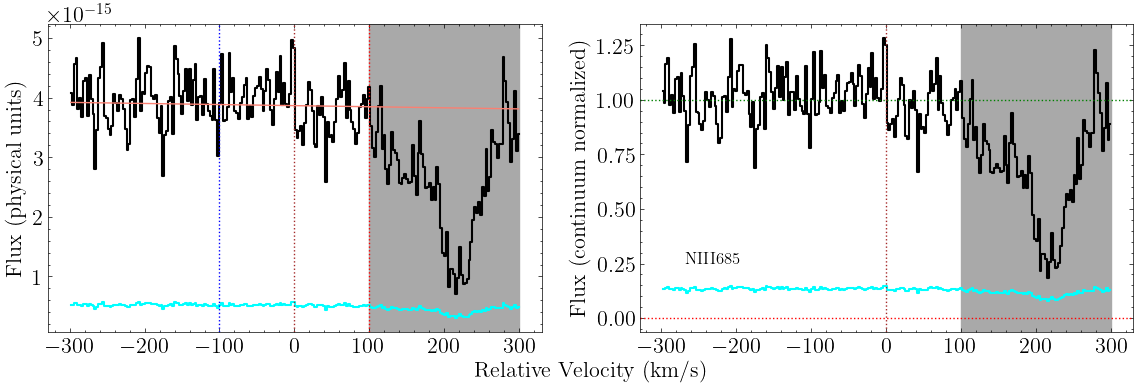

In [349]:
fig, ax = niii_686_fuv.plot_ion_transition_spec_cont()

In [350]:
niii_686_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [391]:
niii_686_fuv.get_upper_lim(10)

logN-1sig: 10.5
logN-2sig: 12.3
logN-3sig: 12.8


## NIII 684

In [352]:
niii_684_fuv = ion_transition('NIII', 684, 'N', z_sys, 'FUV')

In [353]:
niii_684_fuv.grab_ion_transition_info()

In [354]:
niii_684_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-135]])

In [355]:
niii_684_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

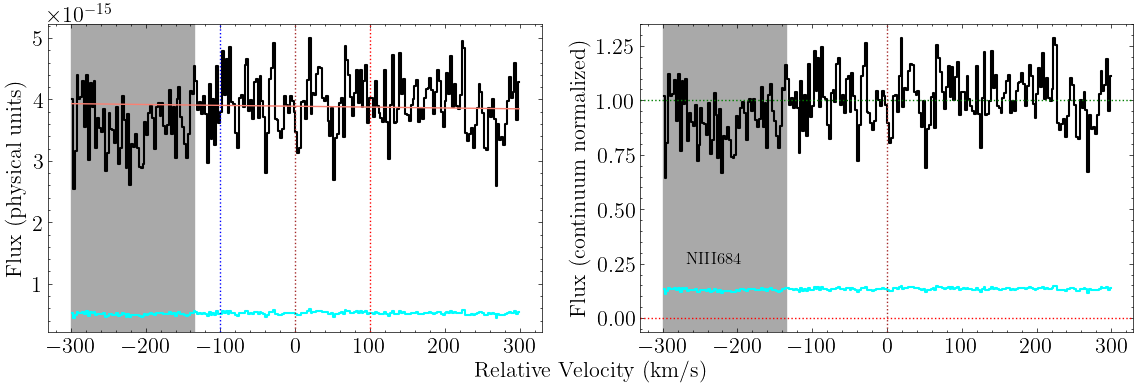

In [356]:
fig, ax = niii_684_fuv.plot_ion_transition_spec_cont()

In [357]:
niii_684_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [392]:
niii_684_fuv.get_upper_lim(10)

logN-1sig: 10.8
logN-2sig: 12.5
logN-3sig: 13.1


# NIV

## NIV 765

In [359]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'FUV')

In [360]:
niv_765_fuv.grab_ion_transition_info()

In [361]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list)

In [362]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

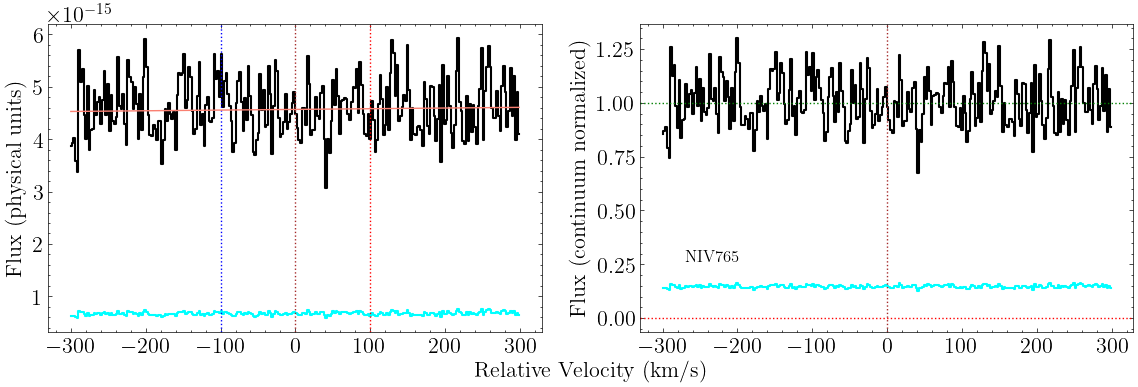

In [363]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [364]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [393]:
niv_765_fuv.get_upper_lim(30)

logN-1sig: 10.3
logN-2sig: 12.0
logN-3sig: 12.5


# OII

## OII 834

In [395]:
oii_834_fuv = ion_transition('OII', 834, 'O', z_sys, 'FUV')

In [396]:
oii_834_fuv.grab_ion_transition_info()

In [397]:
oii_834_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-200,0],[120,300]])

In [398]:
oii_834_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

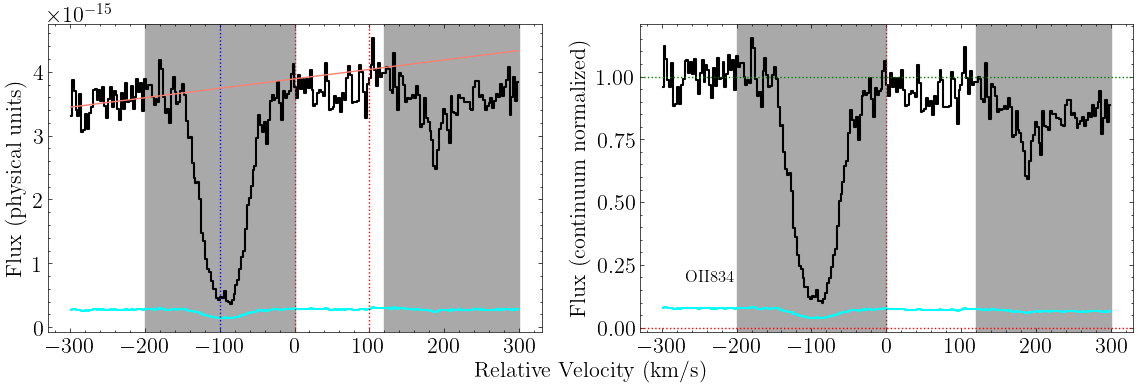

In [399]:
fig, ax = oii_834_fuv.plot_ion_transition_spec_cont()

In [400]:
oii_834_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [401]:
oii_834_fuv.get_upper_lim(10)

logN-1sig: 10.4
logN-2sig: 12.2
logN-3sig: 12.7


# NeVIII

## NeVIII 780

In [402]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'FUV')

In [403]:
neviii_780_fuv.grab_ion_transition_info()

In [404]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[110,300]])

In [405]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

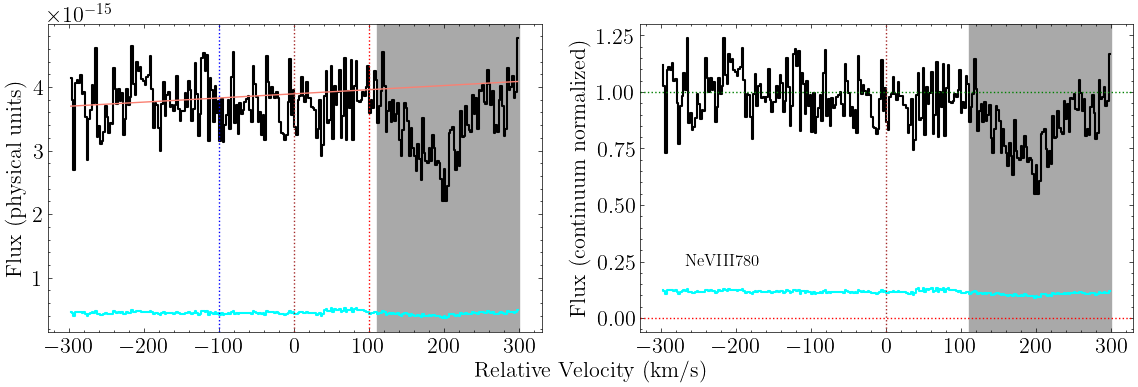

In [406]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [407]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [408]:
neviii_780_fuv.get_upper_lim(75)

logN-1sig: 11.2
logN-2sig: 13.1
logN-3sig: 13.6


# MgII

## MgII 2796 (HIRES)

In [409]:
mgii_2796_hires = ion_transition('MgII', 2796, 'Mg', z_sys, 'HIRES')

In [410]:
mgii_2796_hires.grab_ion_transition_info()

In [411]:
mgii_2796_hires.grab_ion_transition_spec(spec_fits_list)

In [412]:
mgii_2796_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

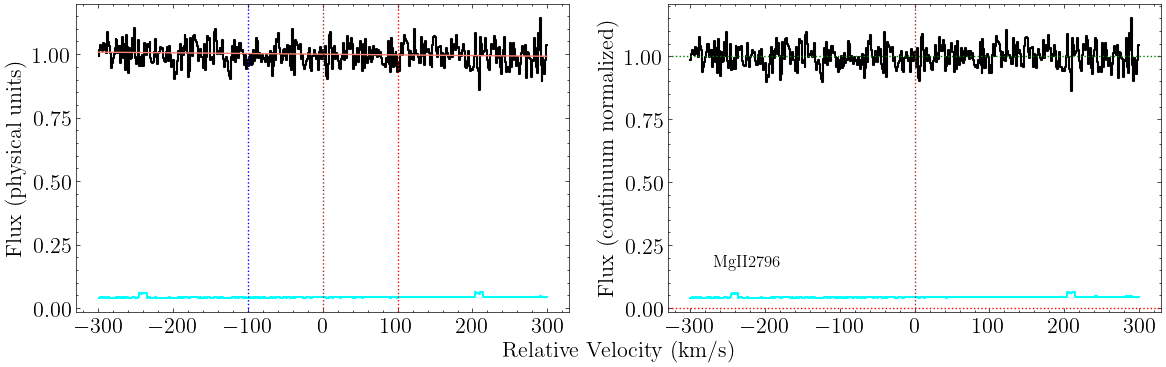

In [413]:
fig, ax = mgii_2796_hires.plot_ion_transition_spec_cont()

In [414]:
mgii_2796_hires.grab_ion_transition_lsf(lsf_fits_list)

In [415]:
mgii_2796_hires.get_upper_lim(10)

logN-1sig: 9.0
logN-2sig: 10.5
logN-3sig: 11.0


## MgII 2803 (HIRES)

In [416]:
mgii_2803_hires = ion_transition('MgII', 2803, 'Mg', z_sys, 'HIRES')

In [417]:
mgii_2803_hires.grab_ion_transition_info()

In [418]:
mgii_2803_hires.grab_ion_transition_spec(spec_fits_list)

In [419]:
mgii_2803_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

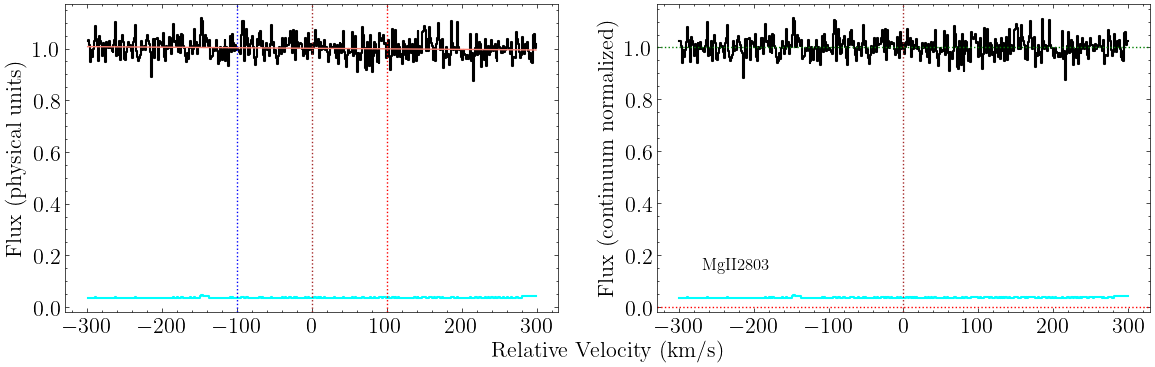

In [420]:
fig, ax = mgii_2803_hires.plot_ion_transition_spec_cont()

In [421]:
mgii_2803_hires.grab_ion_transition_lsf(lsf_fits_list)

In [422]:
mgii_2803_hires.get_upper_lim(10)

logN-1sig: 9.2
logN-2sig: 10.7
logN-3sig: 11.2


# AlIII

## AlIII 1862 (HIRES)

In [423]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [424]:
aliii_1862_hires.grab_ion_transition_info()

In [425]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list)

In [426]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

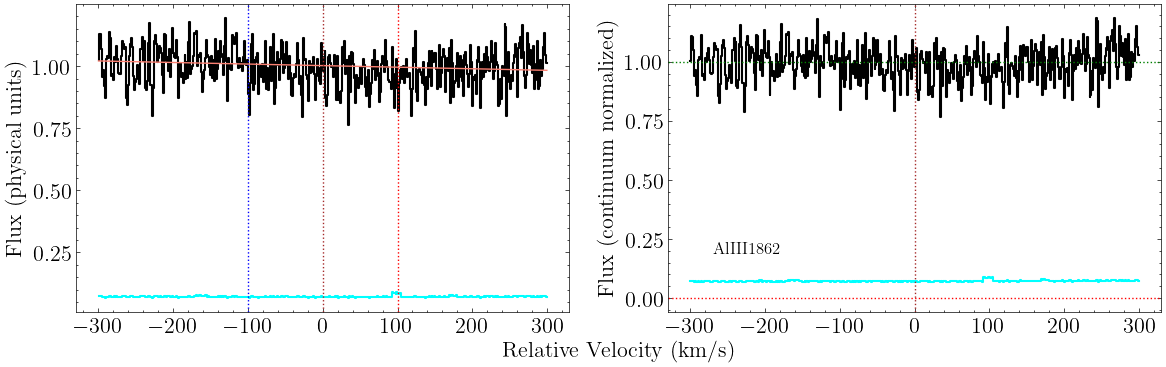

In [427]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [428]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [429]:
aliii_1862_hires.get_upper_lim(10)

logN-1sig: 9.6
logN-2sig: 11.2
logN-3sig: 11.7


## AlIII 1854 (HIRES)

In [430]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [431]:
aliii_1854_hires.grab_ion_transition_info()

In [432]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [433]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

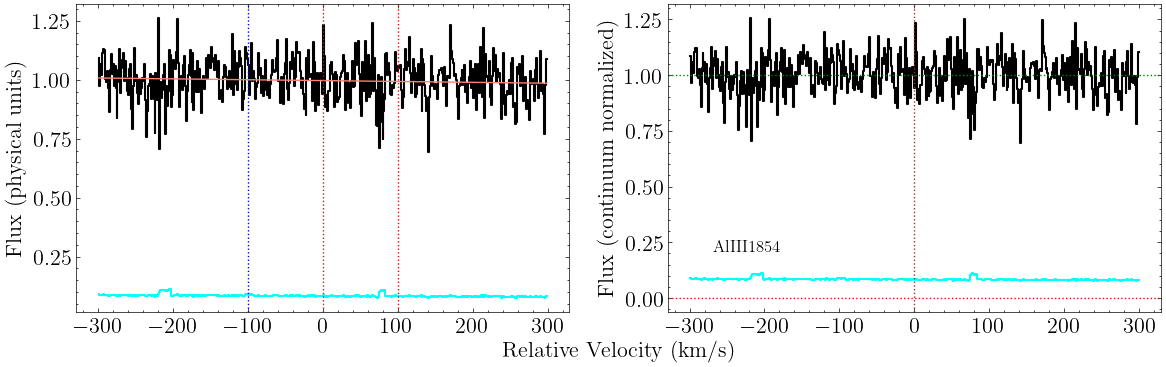

In [434]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [435]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [436]:
aliii_1854_hires.get_upper_lim(10)

logN-1sig: 9.4
logN-2sig: 11.0
logN-3sig: 11.5


# SiII

## SiII 1526 (STIS)

In [437]:
siii_1526_stis = ion_transition('SiII', 1526, 'Si', z_sys, 'STIS')

In [438]:
siii_1526_stis.grab_ion_transition_info()

In [439]:
siii_1526_stis.grab_ion_transition_spec(spec_fits_list)

In [440]:
siii_1526_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

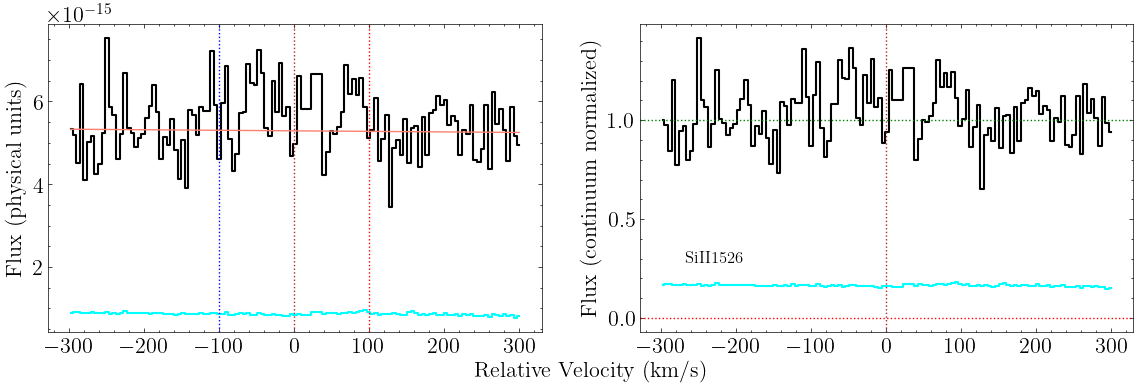

In [441]:
fig, ax = siii_1526_stis.plot_ion_transition_spec_cont()

In [442]:
siii_1526_stis.grab_ion_transition_lsf(lsf_fits_list)

In [443]:
siii_1526_stis.get_upper_lim(10)

logN-1sig: 10.6
logN-2sig: 12.3
logN-3sig: 12.8


## SiII 1260 (STIS)

In [444]:
siii_1260_stis = ion_transition('SiII', 1260, 'Si', z_sys, 'STIS')

In [445]:
siii_1260_stis.grab_ion_transition_info()

In [446]:
siii_1260_stis.grab_ion_transition_spec(spec_fits_list)

In [447]:
siii_1260_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

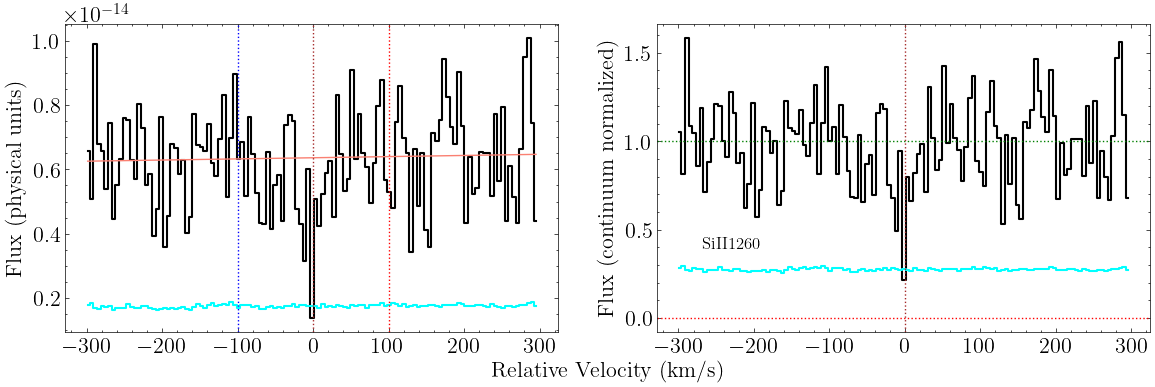

In [448]:
fig, ax = siii_1260_stis.plot_ion_transition_spec_cont()

In [449]:
siii_1260_stis.grab_ion_transition_lsf(lsf_fits_list)

In [450]:
siii_1260_stis.get_upper_lim(10)

logN-1sig: 10.0
logN-2sig: 11.7
logN-3sig: 12.2


## SiII 1193 (STIS)

In [451]:
siii_1193_stis = ion_transition('SiII', 1193, 'Si', z_sys, 'STIS')

In [452]:
siii_1193_stis.grab_ion_transition_info()

In [453]:
siii_1193_stis.grab_ion_transition_spec(spec_fits_list)

In [454]:
siii_1193_stis.cont_norm_flux(v_abs_range=[-150,150], degree=1)

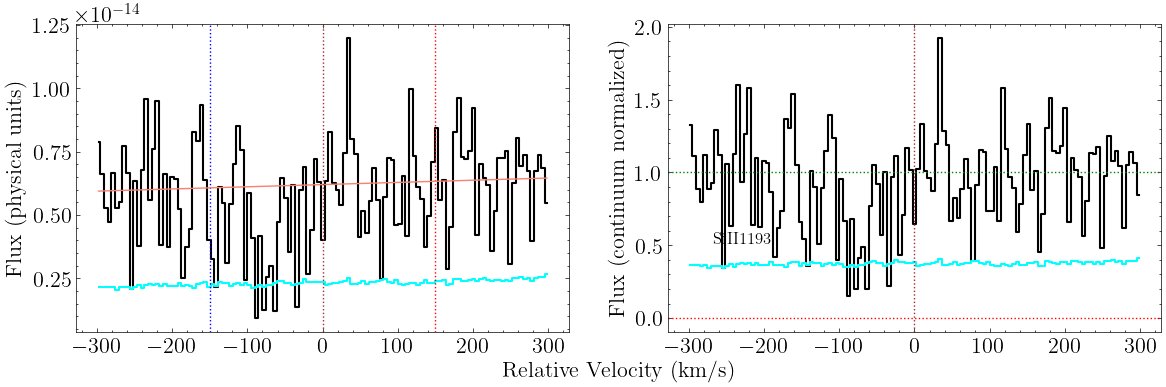

In [455]:
fig, ax = siii_1193_stis.plot_ion_transition_spec_cont()

In [456]:
siii_1193_stis.grab_ion_transition_lsf(lsf_fits_list)

In [457]:
siii_1193_stis.get_upper_lim(10)

logN-1sig: 10.4
logN-2sig: 12.2
logN-3sig: 12.7


## SiII 1190 (STIS)

In [458]:
siii_1190_stis = ion_transition('SiII', 1190, 'Si', z_sys, 'STIS')

In [459]:
siii_1190_stis.grab_ion_transition_info()

In [460]:
siii_1190_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-50]])

In [461]:
siii_1190_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

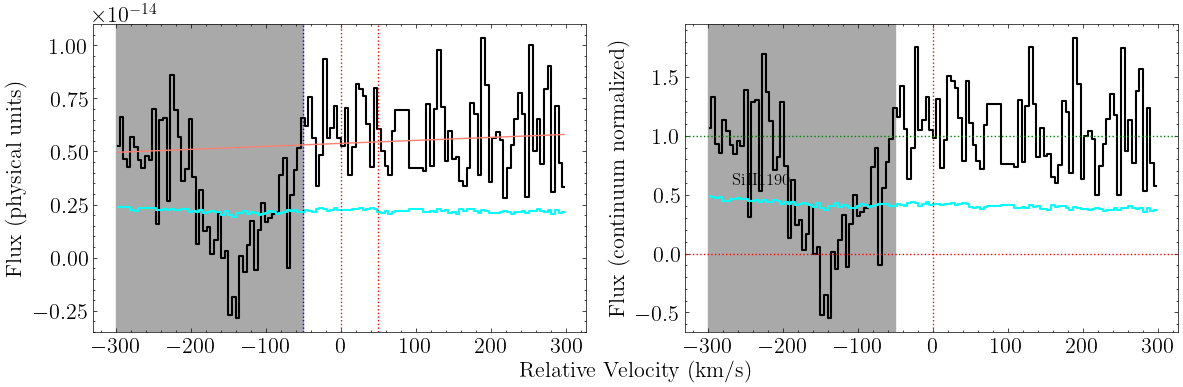

In [462]:
fig, ax = siii_1190_stis.plot_ion_transition_spec_cont()

In [463]:
siii_1190_stis.grab_ion_transition_lsf(lsf_fits_list)

In [464]:
siii_1190_stis.get_upper_lim(10)

logN-1sig: 10.8
logN-2sig: 12.5
logN-3sig: 13.1


## SiII 989

In [465]:
siii_989_fuv = ion_transition('SiII', 989, 'Si', z_sys, 'FUV')

In [466]:
siii_989_fuv.grab_ion_transition_info()

In [467]:
siii_989_fuv.grab_ion_transition_spec(spec_fits_list)

In [468]:
siii_989_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

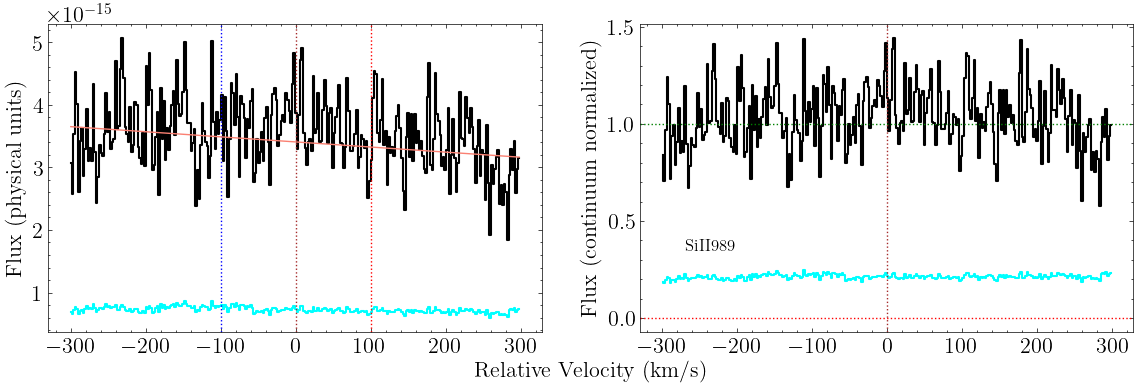

In [469]:
fig, ax = siii_989_fuv.plot_ion_transition_spec_cont()

In [470]:
siii_989_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [471]:
siii_989_fuv.get_upper_lim(10)

logN-1sig: 10.7
logN-2sig: 12.4
logN-3sig: 13.0


# SiIII

## SiIII 1206 (STIS)

In [472]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [473]:
siiii_1206_stis.grab_ion_transition_info()

In [474]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list)

In [475]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

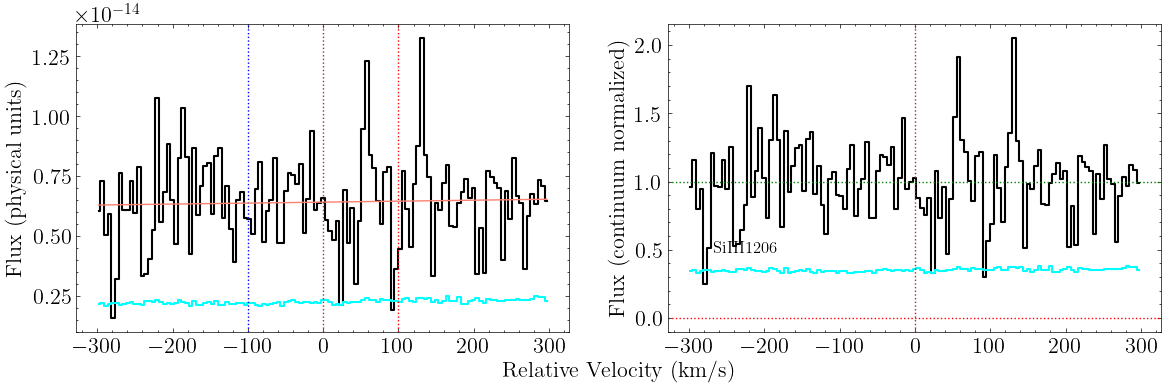

In [476]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [477]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [478]:
siiii_1206_stis.get_upper_lim(10)

logN-1sig: 10.0
logN-2sig: 11.7
logN-3sig: 12.3


# SiIV

## SiIV 1393 (STIS)

In [479]:
siiv_1393_stis = ion_transition('SiIV', 1393, 'Si', z_sys, 'STIS')

In [480]:
siiv_1393_stis.grab_ion_transition_info()

In [481]:
siiv_1393_stis.grab_ion_transition_spec(spec_fits_list, masks=[[40,300]])

In [482]:
siiv_1393_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

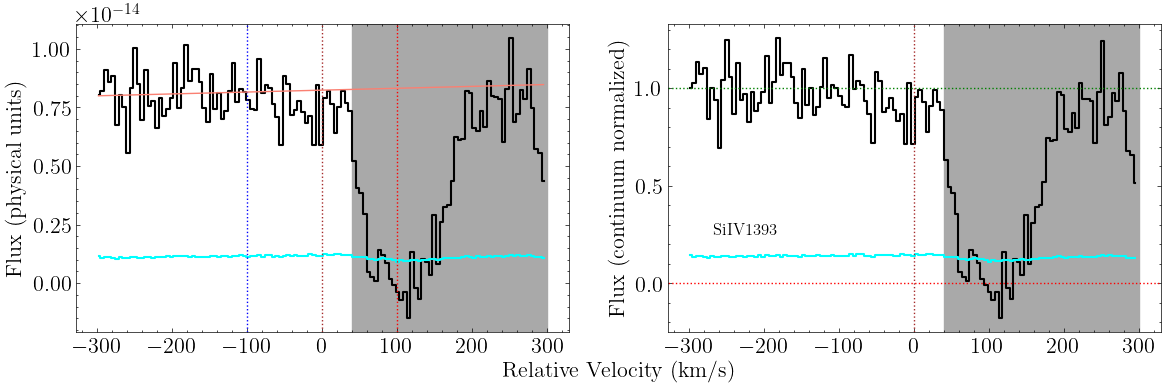

In [483]:
fig, ax = siiv_1393_stis.plot_ion_transition_spec_cont()

In [484]:
siiv_1393_stis.grab_ion_transition_lsf(lsf_fits_list)

In [485]:
siiv_1393_stis.get_upper_lim(10)

logN-1sig: 10.1
logN-2sig: 11.7
logN-3sig: 12.2


## SiIV 1402 (STIS)

In [486]:
siiv_1402_stis = ion_transition('SiIV', 1402, 'Si', z_sys, 'STIS')

In [487]:
siiv_1402_stis.grab_ion_transition_info()

In [488]:
siiv_1402_stis.grab_ion_transition_spec(spec_fits_list)

In [489]:
siiv_1402_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

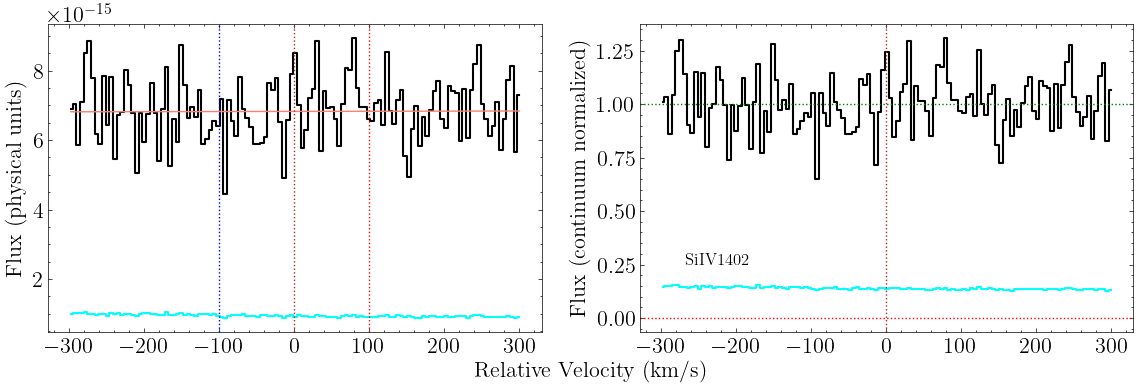

In [490]:
fig, ax = siiv_1402_stis.plot_ion_transition_spec_cont()

In [491]:
siiv_1402_stis.grab_ion_transition_lsf(lsf_fits_list)

In [492]:
siiv_1402_stis.get_upper_lim(10)

logN-1sig: 10.3
logN-2sig: 12.0
logN-3sig: 12.5


# SIV

## SIV 748

In [493]:
siv_748_fuv = ion_transition('SIV', 748, 'S', z_sys, 'FUV')

In [494]:
siv_748_fuv.grab_ion_transition_info()

In [495]:
siv_748_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[140,300]])

In [496]:
siv_748_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

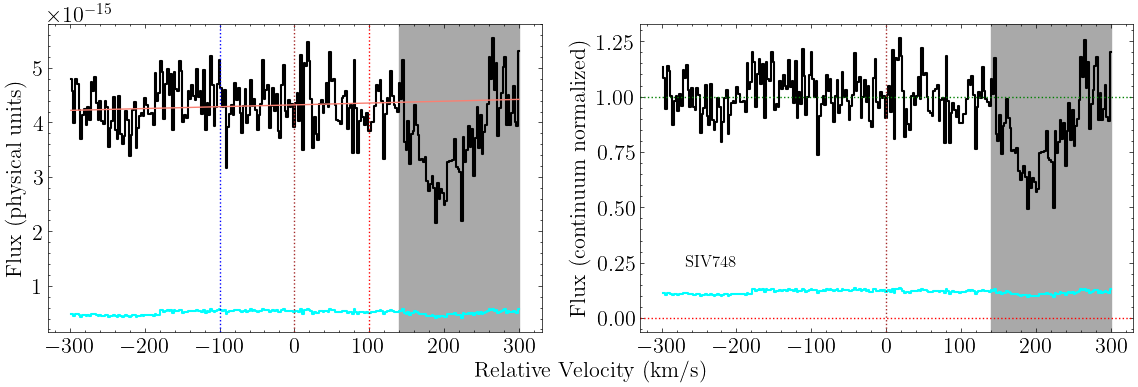

In [497]:
fig, ax = siv_748_fuv.plot_ion_transition_spec_cont()

In [498]:
siv_748_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [499]:
siv_748_fuv.get_upper_lim(10)

logN-1sig: 10.2
logN-2sig: 11.9
logN-3sig: 12.4


# SV

## SV 786

In [500]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'FUV')

In [501]:
sv_786_fuv.grab_ion_transition_info()

In [502]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [503]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

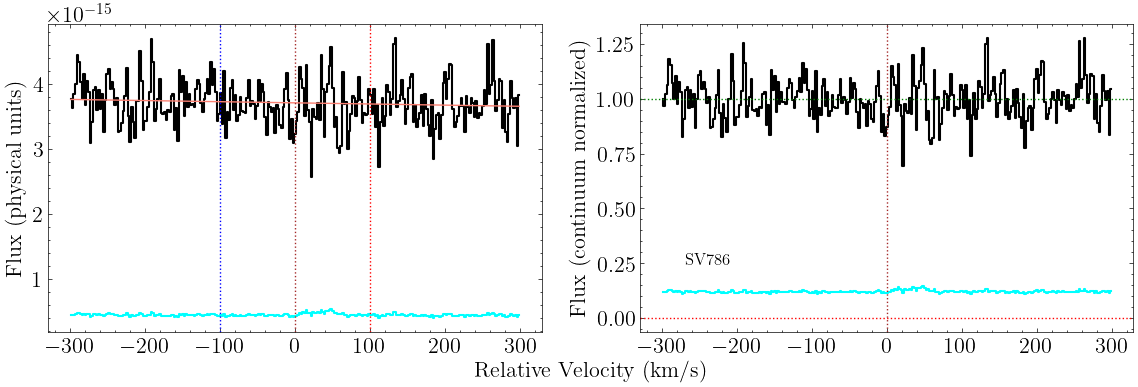

In [504]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [505]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [506]:
sv_786_fuv.get_upper_lim(30)

logN-1sig: 9.9
logN-2sig: 11.5
logN-3sig: 12.0


# SVI

## SVI 944

In [507]:
svi_944_fuv = ion_transition('SVI', 944, 'S', z_sys, 'FUV')

In [508]:
svi_944_fuv.grab_ion_transition_info()

In [509]:
svi_944_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[80,300]])

In [510]:
svi_944_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

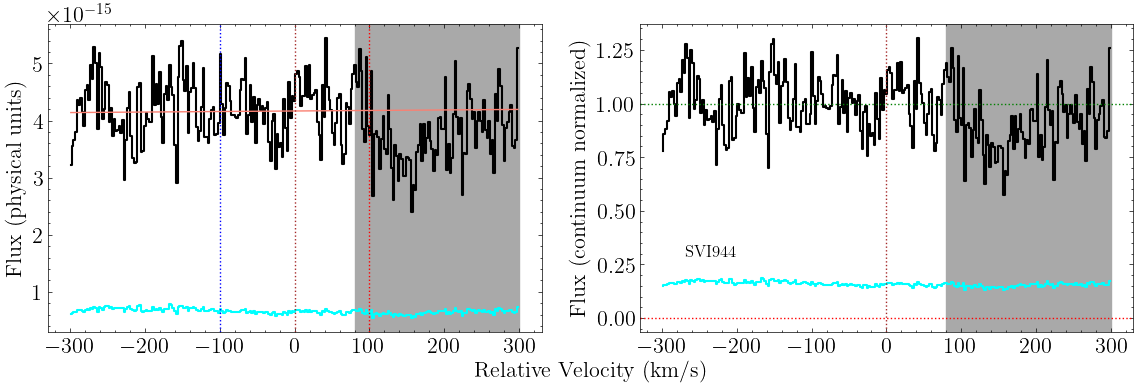

In [511]:
fig, ax = svi_944_fuv.plot_ion_transition_spec_cont()

In [512]:
svi_944_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [513]:
svi_944_fuv.get_upper_lim(75)

logN-1sig: 10.7
logN-2sig: 12.5
logN-3sig: 13.0


# FeII

## FeII 2600 (HIRES)

In [514]:
feii_2600_hires = ion_transition('FeII', 2600, 'Fe', z_sys, 'HIRES')

In [515]:
feii_2600_hires.grab_ion_transition_info()

In [516]:
feii_2600_hires.grab_ion_transition_spec(spec_fits_list)

In [517]:
feii_2600_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

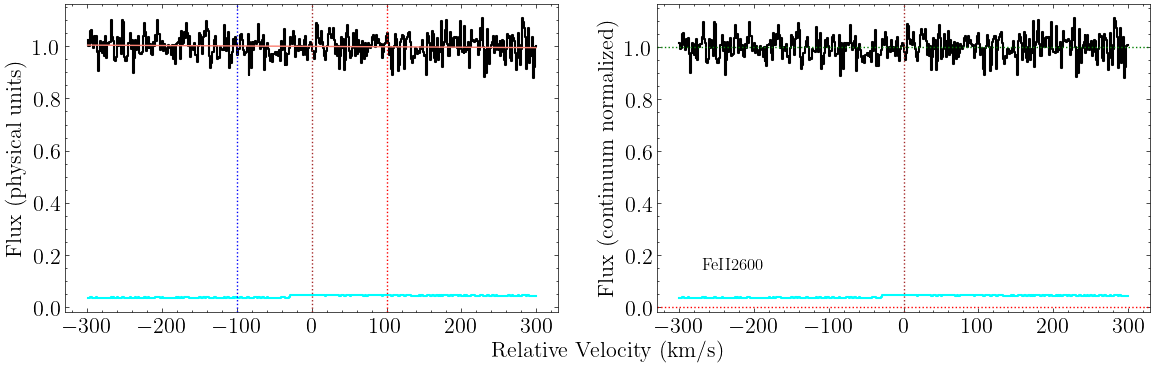

In [518]:
fig, ax = feii_2600_hires.plot_ion_transition_spec_cont()

In [519]:
feii_2600_hires.grab_ion_transition_lsf(lsf_fits_list)

In [520]:
feii_2600_hires.get_upper_lim(10)

logN-1sig: 9.4
logN-2sig: 11.0
logN-3sig: 11.4


## FeII 2382 (HIRES)

In [521]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [522]:
feii_2382_hires.grab_ion_transition_info()

In [523]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [524]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

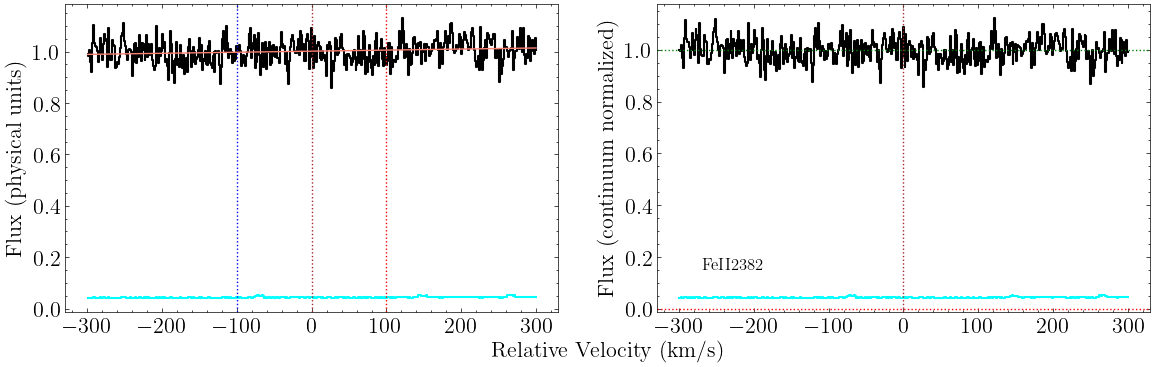

In [525]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [526]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [527]:
feii_2382_hires.get_upper_lim(10)

logN-1sig: 9.3
logN-2sig: 10.9
logN-3sig: 11.3


## FeII 2344 (HIRES)

In [528]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [529]:
feii_2344_hires.grab_ion_transition_info()

In [530]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [531]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

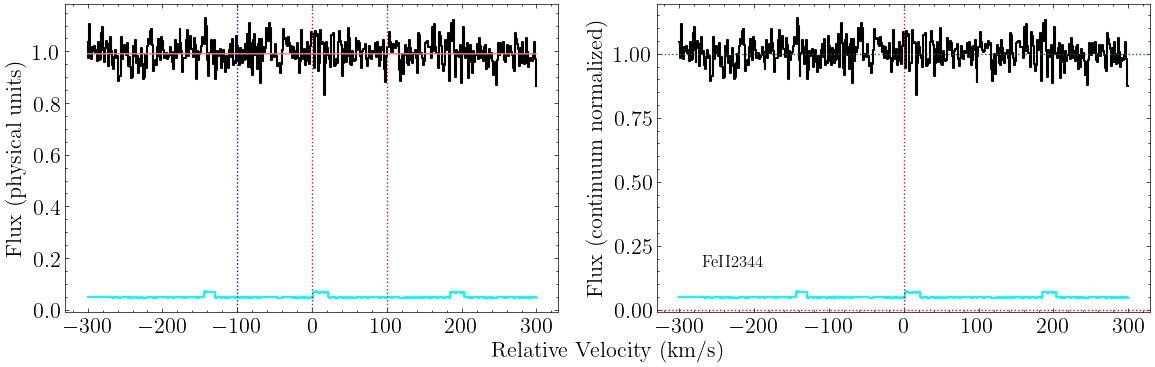

In [532]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [533]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [534]:
feii_2344_hires.get_upper_lim(10)

logN-1sig: 9.8
logN-2sig: 11.4
logN-3sig: 11.9
